In [1]:
# Common imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Base parameters
n_timesteps = 365  # One year
np.random.seed(42)  # For reproducibility

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')
time_numeric = np.arange(n_timesteps)

# Calendar features (common across all datasets)
day_of_week = dates.dayofweek  # 0=Monday, 6=Sunday
is_weekend = (day_of_week >= 5).astype(int)
month = dates.month
day_of_week_sin = np.sin(2 * np.pi * day_of_week / 7)
day_of_week_cos = np.cos(2 * np.pi * day_of_week / 7)
day_of_month_sin = np.sin(2 * np.pi * dates.day / 30)
day_of_month_cos = np.cos(2 * np.pi * dates.day / 30)
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# Common holidays
is_holiday = np.zeros(n_timesteps)
major_holidays = [0, 31, 59, 120, 185, 245, 335, 358]  # Approx: Jan 1, Feb 1, Mar 1, May 1, Jul 5, Sep 2, Dec 1, Dec 24
for day in major_holidays:
    if day < n_timesteps:
        is_holiday[day] = 1

random_holidays = np.random.choice(range(n_timesteps), size=10, replace=False)
is_holiday[random_holidays] = 1

# Function to get temperature with seasonal pattern
def get_temperature(amplitude=10, phase_shift=np.pi, noise_scale=2):
    temp_seasonal = 15 + amplitude * np.sin(2 * np.pi * time_numeric / 365 + phase_shift)
    temp_noise = np.random.randn(n_timesteps) * noise_scale
    return temp_seasonal + temp_noise

# Function to get promotion periods
def get_promotions(num_promotions=3, avg_duration=15):
    is_promotion = np.zeros(n_timesteps)
    promo_starts = np.random.choice(range(n_timesteps - avg_duration), size=num_promotions, replace=False)
    
    for start in promo_starts:
        duration = int(avg_duration * (0.8 + 0.4 * np.random.random()))  # Variable duration
        end = min(start + duration, n_timesteps)
        is_promotion[start:end] = 1
    
    return is_promotion

Original dataset:


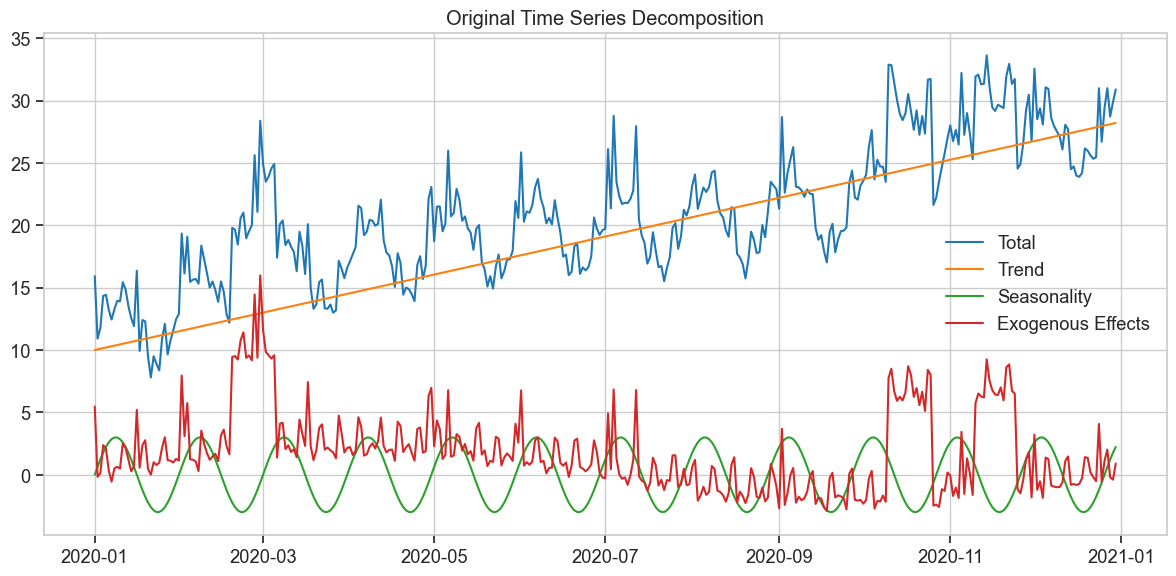

In [2]:
# Cell 1: Original Dataset (for reference)

# Parameters
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi)
is_promotion = get_promotions(num_promotions=3, avg_duration=15)

# Exogenous effects
temp_effect = -0.2 * (temperature - 15)  # Normalized effect
weekend_effect = 2.0 * is_weekend
holiday_effect = 5.0 * is_holiday
promotion_effect = 8.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_original = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Original dataset:")
df_original.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_original.index, df_original['value'], label='Total')
plt.plot(df_original.index, df_original['trend'], label='Trend')
plt.plot(df_original.index, df_original['seasonality'], label='Seasonality')
plt.plot(df_original.index, df_original['exog_effects'], label='Exogenous Effects')

plt.title('Original Time Series Decomposition')
plt.legend()
plt.tight_layout()
plt.show()

Strong trend dataset:


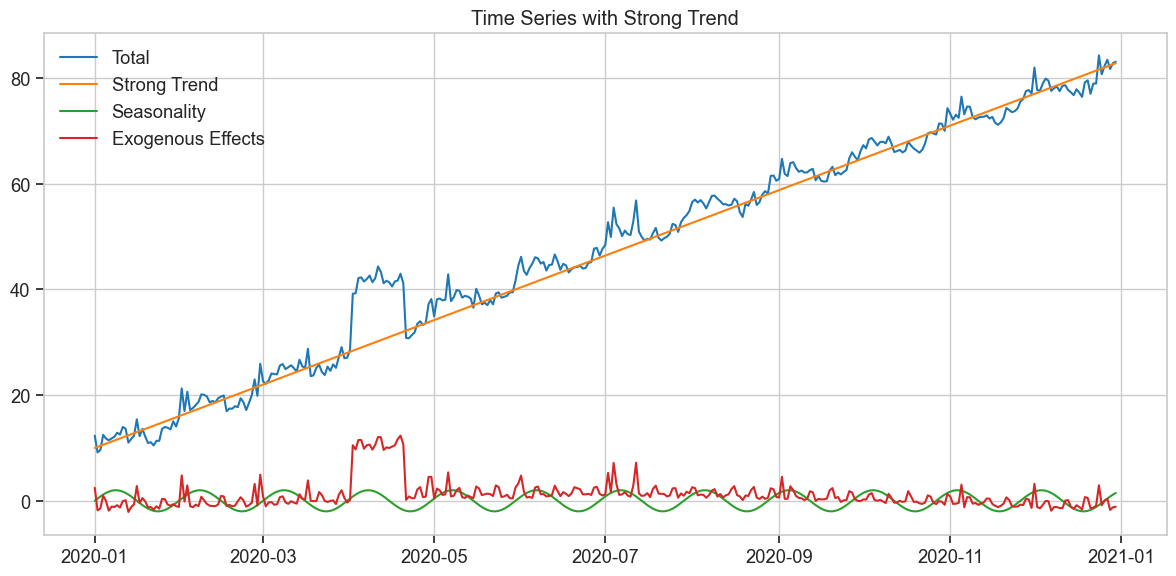

In [3]:
# Cell 2: Dataset with Strong Trend

# Parameters - strong upward trend
trend_slope = 0.2  # Much steeper trend (4x stronger)
seasonal_amplitude = 2  # Slightly weaker seasonality
seasonal_period = 30
noise_std = 0.4  # Slightly more noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=8, phase_shift=np.pi/2)  # Different temp pattern
is_promotion = get_promotions(num_promotions=2, avg_duration=20)  # Fewer, longer promotions

# Exogenous effects - different coefficients
temp_effect = -0.15 * (temperature - 15)
weekend_effect = 1.5 * is_weekend  # Reduced weekend effect
holiday_effect = 4.0 * is_holiday  # Reduced holiday effect
promotion_effect = 10.0 * is_promotion  # Stronger promotion effect

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_strong_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Strong trend dataset:")
df_strong_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_strong_trend.index, df_strong_trend['value'], label='Total')
plt.plot(df_strong_trend.index, df_strong_trend['trend'], label='Strong Trend')
plt.plot(df_strong_trend.index, df_strong_trend['seasonality'], label='Seasonality')
plt.plot(df_strong_trend.index, df_strong_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Strong Trend')
plt.legend()
plt.tight_layout()
plt.show()

Strong seasonality dataset:


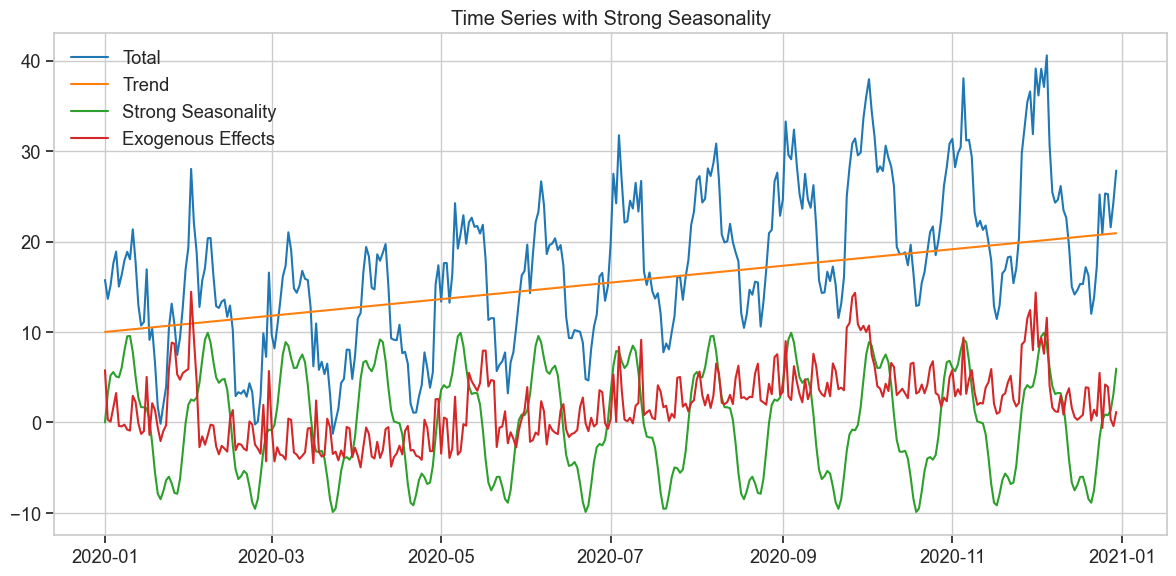

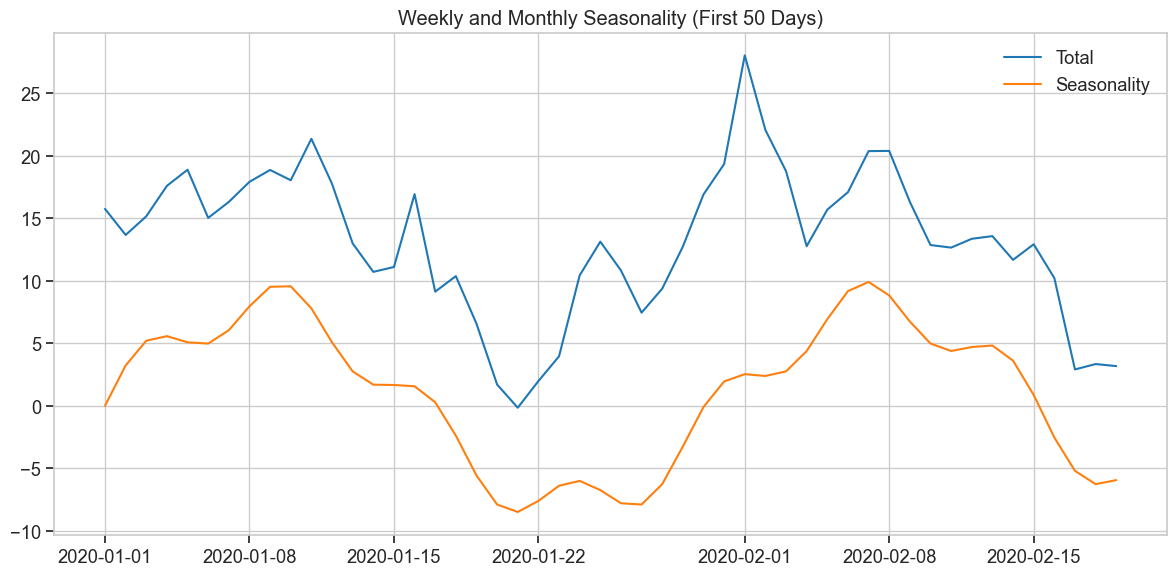

In [4]:
# Cell 3: Dataset with Strong Seasonality

# Parameters - strong seasonality
trend_slope = 0.03  # Weaker trend
seasonal_amplitude = 8  # Much stronger seasonality
seasonal_period = 30
noise_std = 0.5

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Add second seasonality component (weekly)
weekly_seasonality = 2 * np.sin(2 * np.pi * time_numeric / 7)
seasonality += weekly_seasonality

# Create exogenous variables
temperature = get_temperature(amplitude=12, phase_shift=0)  # Different temp pattern
is_promotion = get_promotions(num_promotions=4, avg_duration=10)  # More promotions, shorter duration

# Exogenous effects
temp_effect = -0.3 * (temperature - 15)  # Stronger temperature effect
weekend_effect = 3.0 * is_weekend  # Stronger weekend effect 
holiday_effect = 6.0 * is_holiday  # Stronger holiday effect
promotion_effect = 7.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_strong_seasonality = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Strong seasonality dataset:")
df_strong_seasonality.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_strong_seasonality.index, df_strong_seasonality['value'], label='Total')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['trend'], label='Trend')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['seasonality'], label='Strong Seasonality')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Strong Seasonality')
plt.legend()
plt.tight_layout()
plt.show()

# Zoom in to see weekly patterns
plt.figure(figsize=(12, 6))
plt.plot(df_strong_seasonality.index[0:50], df_strong_seasonality['value'][0:50], label='Total')
plt.plot(df_strong_seasonality.index[0:50], df_strong_seasonality['seasonality'][0:50], label='Seasonality')

plt.title('Weekly and Monthly Seasonality (First 50 Days)')
plt.legend()
plt.tight_layout()
plt.show()

Changing trend dataset:


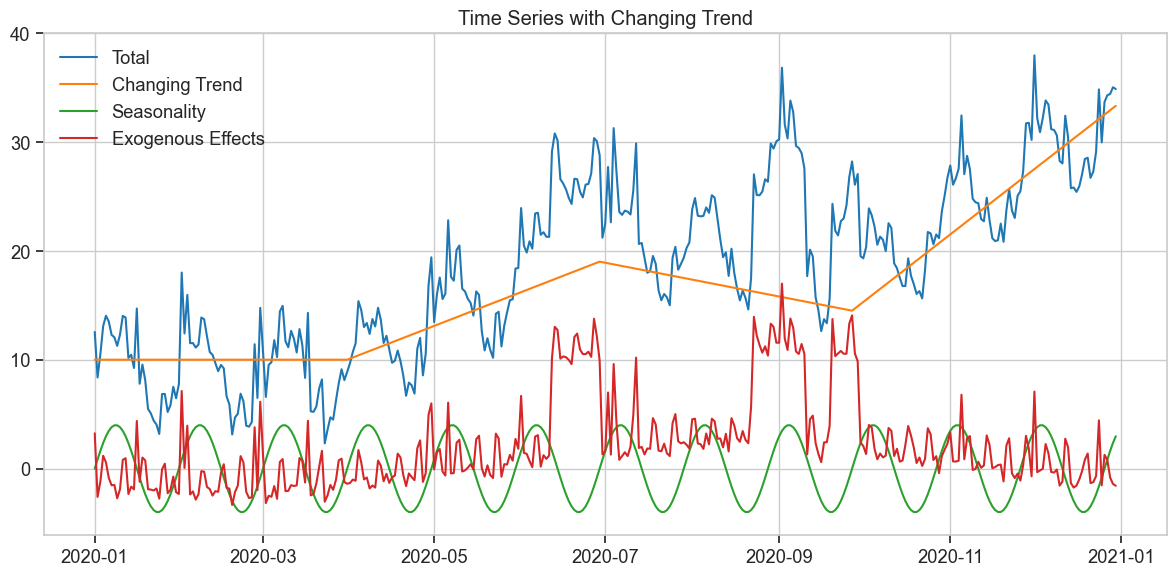

In [5]:
# Cell 4: Dataset with Changing Trend (regime change)

# Parameters
seasonal_amplitude = 4
seasonal_period = 30
noise_std = 0.4

# Generate piece-wise trend with change points
trend = np.zeros(n_timesteps)
# First segment: Flat
trend[0:90] = 10
# Second segment: Upward trend
trend[90:180] = 10 + 0.1 * np.arange(90)
# Third segment: Downward trend
trend[180:270] = 19 - 0.05 * np.arange(90)
# Fourth segment: Steep upward trend
trend[270:] = 14.5 + 0.2 * np.arange(len(trend[270:]))

# Seasonality
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=9, phase_shift=np.pi/4)
is_promotion = get_promotions(num_promotions=5, avg_duration=12)

# Exogenous effects
temp_effect = -0.25 * (temperature - 15)
weekend_effect = 2.5 * is_weekend
holiday_effect = 6.0 * is_holiday
promotion_effect = 9.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_changing_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Changing trend dataset:")
df_changing_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_changing_trend.index, df_changing_trend['value'], label='Total')
plt.plot(df_changing_trend.index, df_changing_trend['trend'], label='Changing Trend')
plt.plot(df_changing_trend.index, df_changing_trend['seasonality'], label='Seasonality')
plt.plot(df_changing_trend.index, df_changing_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Changing Trend')
plt.legend()
plt.tight_layout()
plt.show()

Exogenous-dominant dataset:


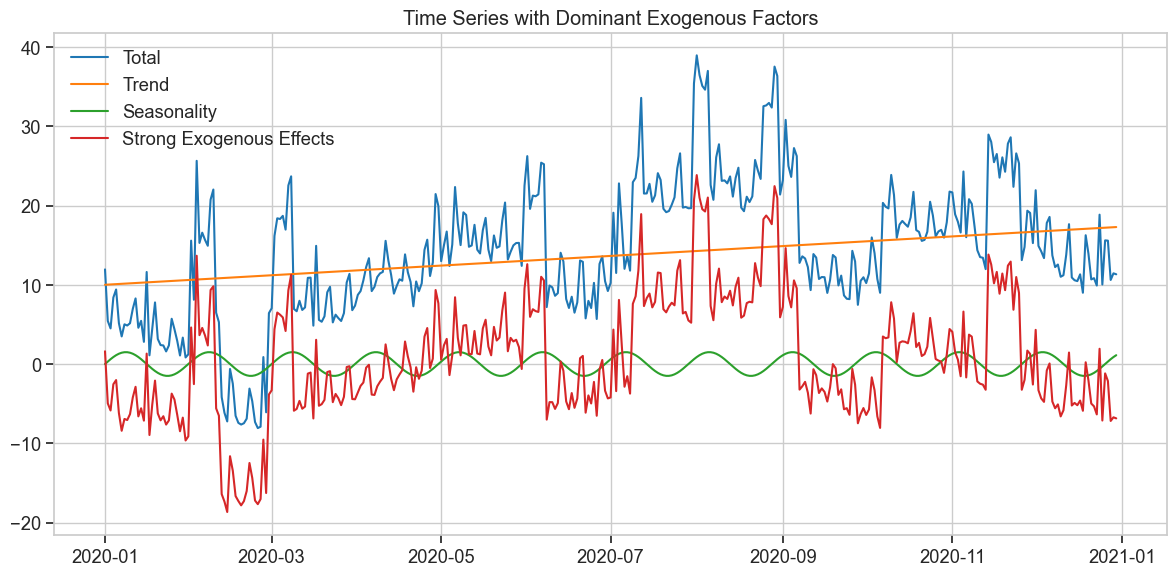

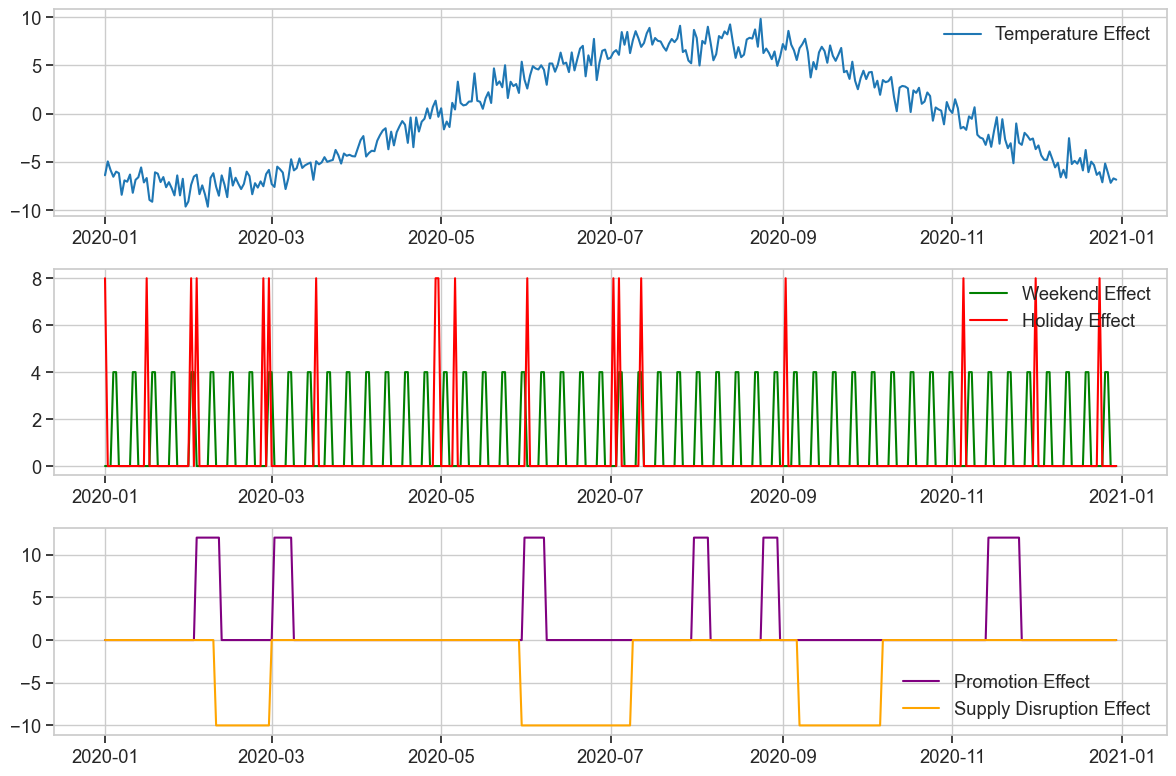

In [6]:
# Cell 5: Dataset with Dominant Exogenous Factors

# Parameters - weak trend and seasonality, strong exogenous factors
trend_slope = 0.02  # Very weak trend
seasonal_amplitude = 1.5  # Weak seasonality
seasonal_period = 30
noise_std = 0.3

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables with stronger effects
temperature = get_temperature(amplitude=15, phase_shift=np.pi/3)  # More extreme temperature swings
is_promotion = get_promotions(num_promotions=8, avg_duration=8)  # More frequent, shorter promotions

# Create additional exogenous factor: supply chain disruptions
supply_disruption = np.zeros(n_timesteps)
disruption_periods = [(40, 60), (150, 190), (250, 280)]
for start, end in disruption_periods:
    supply_disruption[start:end] = 1

# Exogenous effects - much stronger
temp_effect = -0.5 * (temperature - 15)  # Stronger temperature effect
weekend_effect = 4.0 * is_weekend  # Stronger weekend effect
holiday_effect = 8.0 * is_holiday  # Stronger holiday effect
promotion_effect = 12.0 * is_promotion  # Stronger promotion effect
supply_effect = -10.0 * supply_disruption  # Strong negative effect from supply disruptions

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect + supply_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_exogenous_dominant = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'supply_disruption': supply_disruption,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Exogenous-dominant dataset:")
df_exogenous_dominant.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['value'], label='Total')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['trend'], label='Trend')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['seasonality'], label='Seasonality')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['exog_effects'], label='Strong Exogenous Effects')

plt.title('Time Series with Dominant Exogenous Factors')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize individual exogenous factors
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_exogenous_dominant.index, temp_effect, label='Temperature Effect')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_exogenous_dominant.index, weekend_effect, color='green', label='Weekend Effect')
plt.plot(df_exogenous_dominant.index, holiday_effect, color='red', label='Holiday Effect')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_exogenous_dominant.index, promotion_effect, color='purple', label='Promotion Effect')
plt.plot(df_exogenous_dominant.index, supply_effect, color='orange', label='Supply Disruption Effect')
plt.legend()

plt.tight_layout()
plt.show()

High noise dataset:


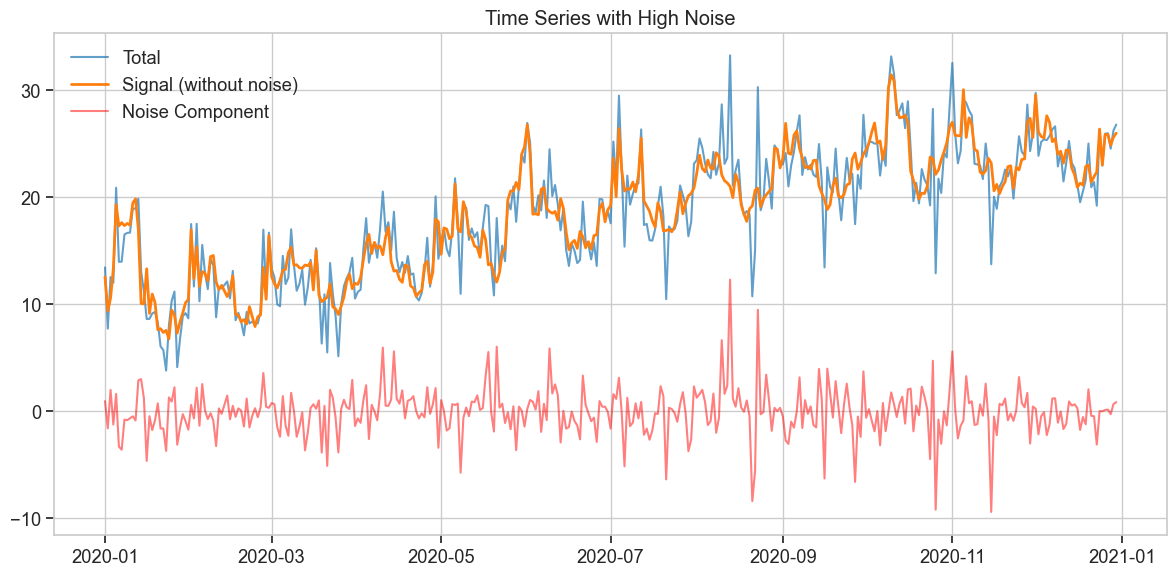

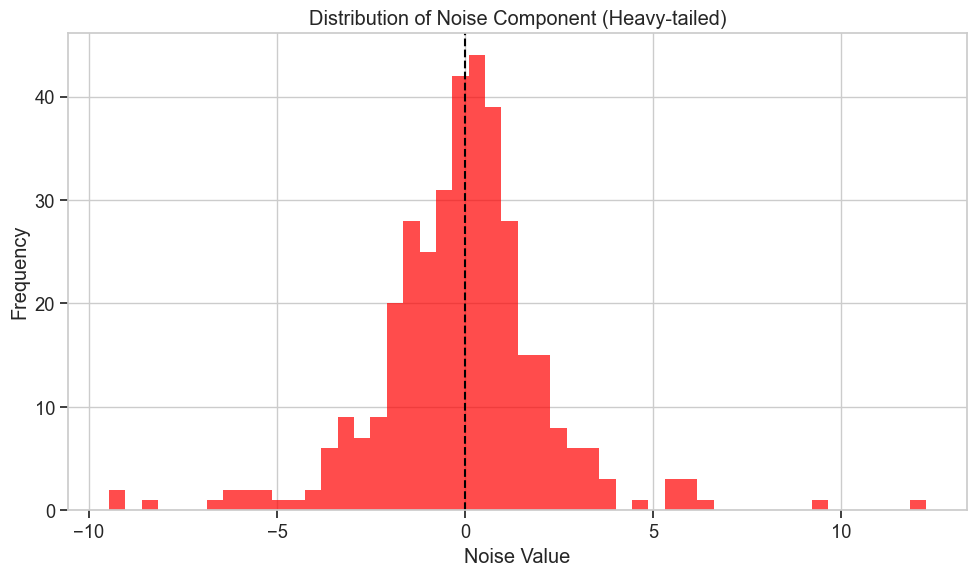

In [7]:
# Cell 6: Dataset with High Noise

# Parameters - high noise with heavy tails
trend_slope = 0.04  # Small trend
seasonal_amplitude = 2.5  # Moderate seasonality
seasonal_period = 30
noise_std = 1.5  # Much higher noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=8, phase_shift=np.pi/6)
is_promotion = get_promotions(num_promotions=3, avg_duration=10)

# Exogenous effects - moderate
temp_effect = -0.2 * (temperature - 15)
weekend_effect = 2.0 * is_weekend
holiday_effect = 4.0 * is_holiday
promotion_effect = 6.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# Generate heavy-tailed noise (Student's t-distribution with df=3)
np.random.seed(42)  # Reset seed for consistency
noise = np.random.standard_t(df=3, size=n_timesteps) * noise_std

# Add some outliers
outlier_positions = np.random.choice(range(n_timesteps), size=5, replace=False)
outlier_magnitudes = np.random.choice([-1, 1], size=5) * np.random.uniform(5, 10, size=5)
for pos, mag in zip(outlier_positions, outlier_magnitudes):
    noise[pos] += mag

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_high_noise = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("High noise dataset:")
df_high_noise.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_high_noise.index, df_high_noise['value'], label='Total', alpha=0.7)
plt.plot(df_high_noise.index, df_high_noise['trend'] + df_high_noise['seasonality'] + df_high_noise['exog_effects'], 
         label='Signal (without noise)', linewidth=2)
plt.plot(df_high_noise.index, df_high_noise['noise'], label='Noise Component', alpha=0.5, color='red')

plt.title('Time Series with High Noise')
plt.legend()
plt.tight_layout()
plt.show()

# Histogram of noise to show heavy tails
plt.figure(figsize=(10, 6))
plt.hist(df_high_noise['noise'], bins=50, alpha=0.7, color='red')
plt.title('Distribution of Noise Component (Heavy-tailed)')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Noise Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Geometric Brownian Motion dataset:


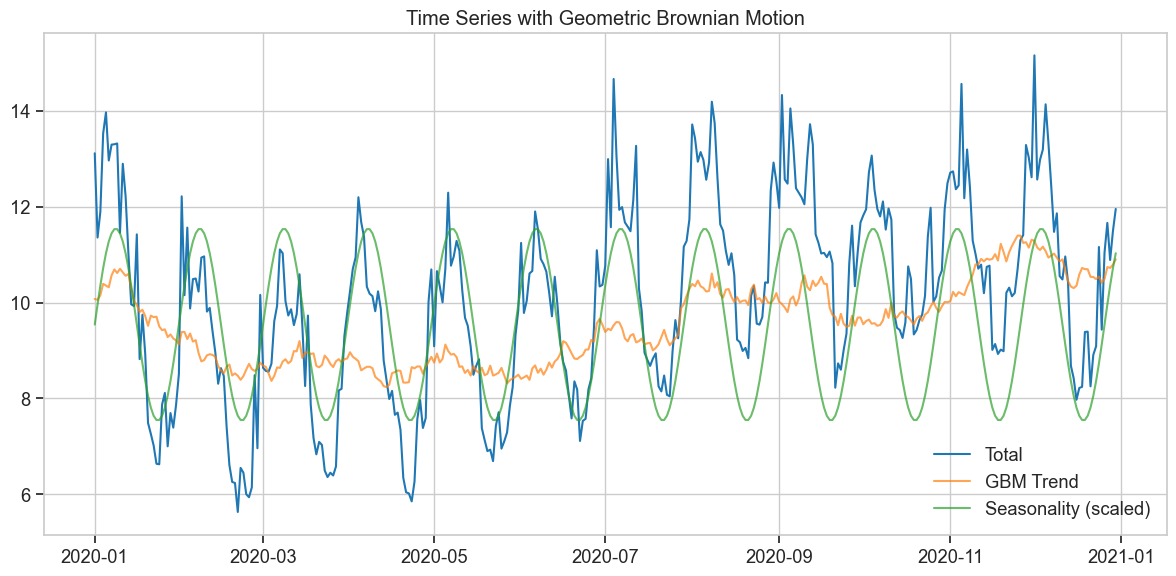

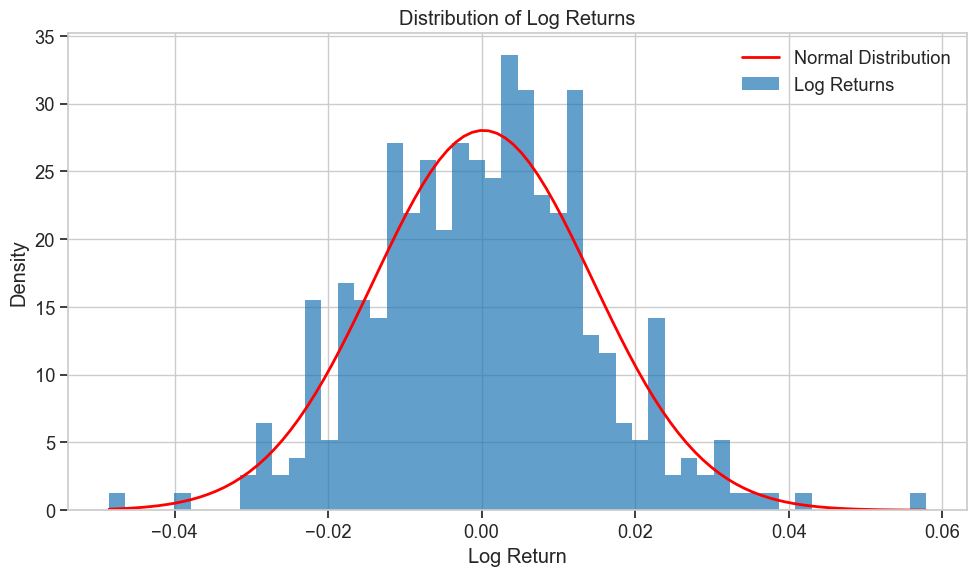

In [12]:
# Cell 7: Dataset with Geometric Brownian Motion (GBM)

# Parameters for Geometric Brownian Motion
mu = 0.0002  # Drift (daily)
sigma = 0.015  # Volatility (daily)
S0 = 10  # Initial value
seasonal_amplitude = 2  # Still add some seasonality
seasonal_period = 30

# Generate GBM path
np.random.seed(42)  # Reset for consistency
dt = 1  # Daily time steps
brownian_increments = np.random.normal(0, np.sqrt(dt), n_timesteps)
W = np.cumsum(brownian_increments)  # Brownian motion path

# GBM formula: S(t) = S0 * exp((mu - 0.5*sigma^2)*t + sigma*W(t))
time = np.arange(n_timesteps) * dt
drift_term = (mu - 0.5 * sigma**2) * time
diffusion_term = sigma * W
trend = S0 * np.exp(drift_term + diffusion_term)

# Add seasonality
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables with moderate effects
temperature = get_temperature(amplitude=8, phase_shift=np.pi/4)
is_promotion = get_promotions(num_promotions=4, avg_duration=10)

# Exogenous effects - moderate, with multiplicative effect
temp_effect = -0.01 * (temperature - 15) * trend  # Multiplicative effect (proportion of trend)
weekend_effect = 0.1 * is_weekend * trend  # Weekends increase by 10%
holiday_effect = 0.2 * is_holiday * trend  # Holidays increase by 20%
promotion_effect = 0.15 * is_promotion * trend  # Promotions increase by 15%

# Combine effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# No additional noise term - GBM already has stochasticity
values = trend + seasonality + exog_effects

# Create DataFrame
df_gbm = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos,
    'gbm_drift': drift_term,
    'gbm_diffusion': diffusion_term
}, index=dates)

# Display the first few rows
print("Geometric Brownian Motion dataset:")
df_gbm.head()

# Log returns calculation
df_gbm['log_returns'] = np.log(df_gbm['trend'] / df_gbm['trend'].shift(1)).fillna(0)

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_gbm.index, df_gbm['value'], label='Total', linewidth=1.5)
plt.plot(df_gbm.index, df_gbm['trend'], label='GBM Trend', alpha=0.7)
plt.plot(df_gbm.index, df_gbm['seasonality'] + df_gbm['trend'].mean(), label='Seasonality (scaled)', alpha=0.7)

plt.title('Time Series with Geometric Brownian Motion')
plt.legend()
plt.tight_layout()
plt.show()

# Look at log returns (should be normally distributed)
plt.figure(figsize=(10, 6))
plt.hist(df_gbm['log_returns'][1:], bins=50, alpha=0.7, density=True)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')

# Overlay a normal distribution for comparison
x = np.linspace(min(df_gbm['log_returns'][1:]), max(df_gbm['log_returns'][1:]), 100)
plt.plot(x, norm.pdf(x, df_gbm['log_returns'][1:].mean(), df_gbm['log_returns'][1:].std()), 
         linewidth=2, color='red')
plt.legend(['Normal Distribution', 'Log Returns'])
plt.tight_layout()
plt.show()

Dataset with seasonal heteroskedasticity:


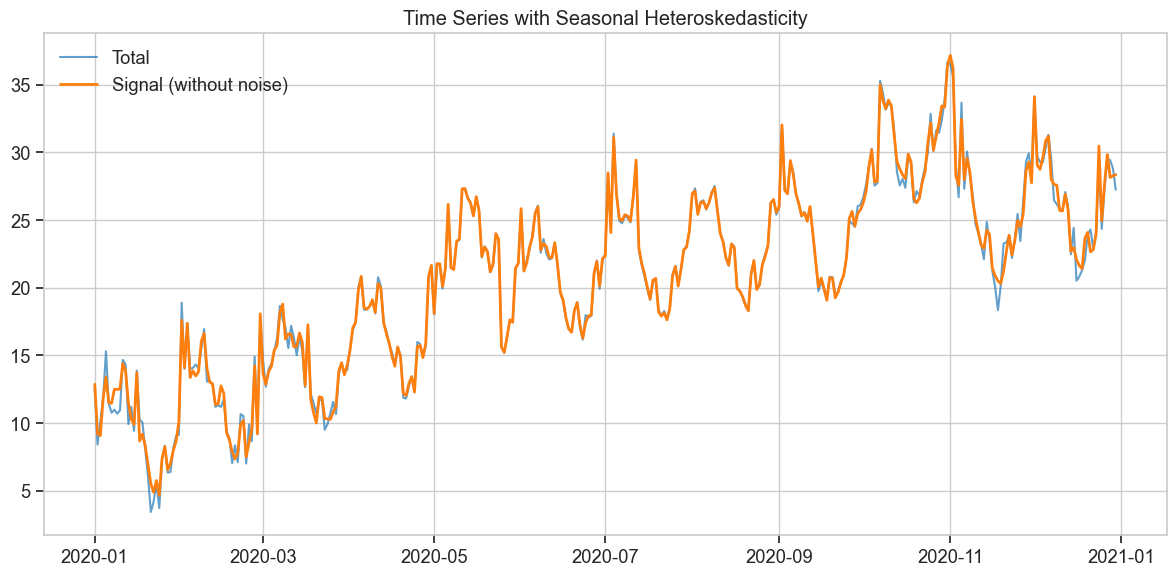

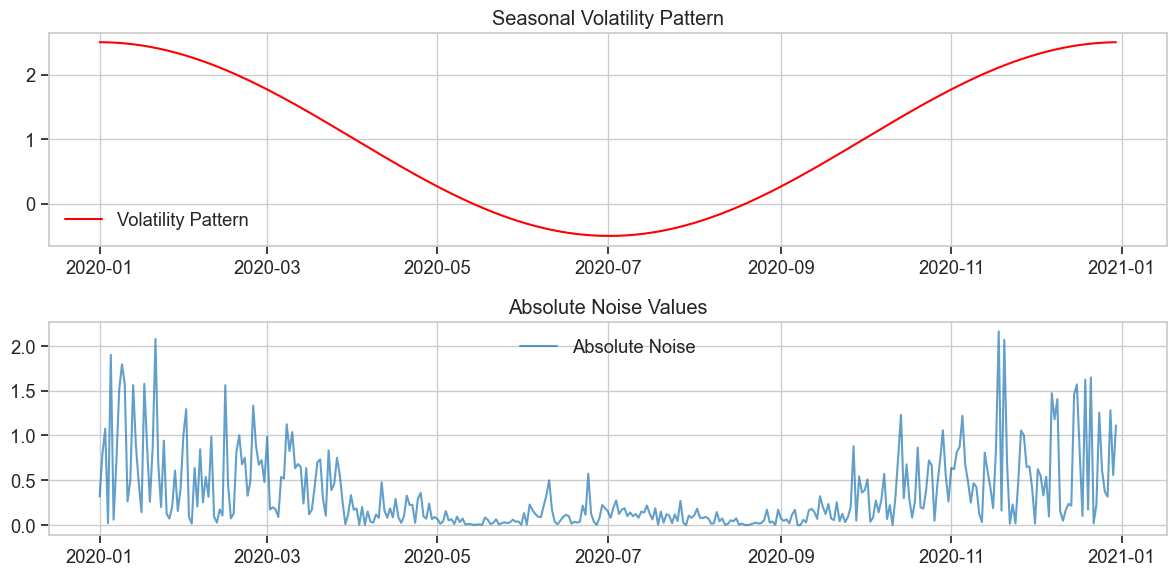

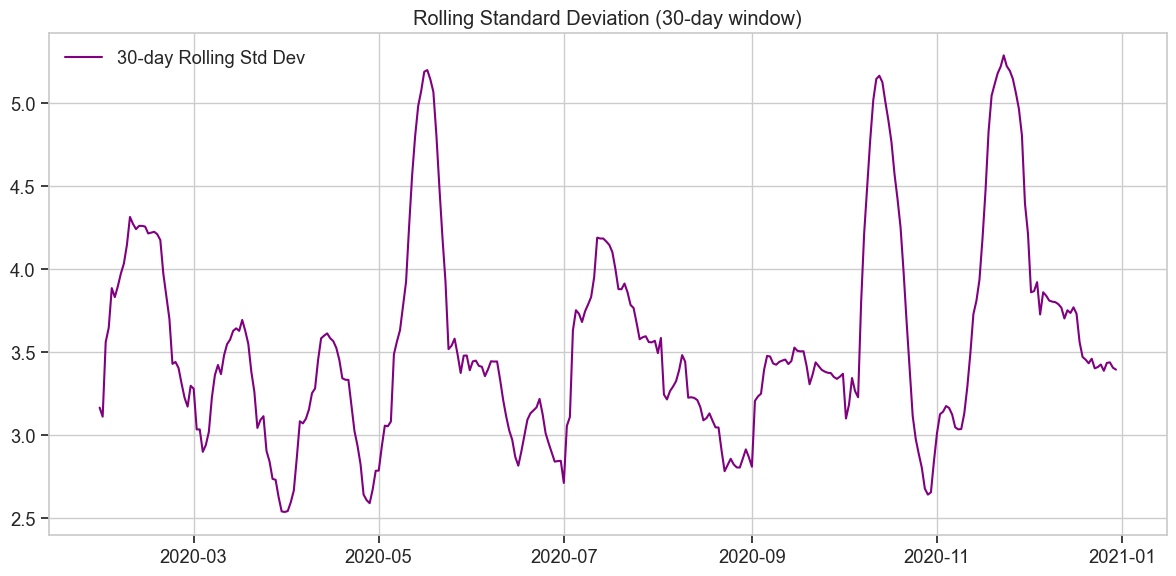

In [10]:
# Cell 8: Dataset with Seasonal Heteroskedasticity (variance changes with seasons)

# Parameters
trend_slope = 0.05
seasonal_amplitude = 4
seasonal_period = 30
base_noise_std = 0.4  # Base level of noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi/2)
is_promotion = get_promotions(num_promotions=3, avg_duration=15)

# Exogenous effects
temp_effect = -0.2 * (temperature - 15)
weekend_effect = 2.0 * is_weekend
holiday_effect = 5.0 * is_holiday
promotion_effect = 7.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# Create seasonal volatility (higher in winter, lower in summer)
# Higher variance in Q1 and Q4, lower in Q2 and Q3
seasonal_volatility = 1.0 + 1.5 * np.cos(2 * np.pi * time_numeric / 365)  # Higher in winter
noise = np.random.randn(n_timesteps) * base_noise_std * seasonal_volatility

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_heteroskedastic = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'seasonal_volatility': seasonal_volatility,  # Store the volatility pattern
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Dataset with seasonal heteroskedasticity:")
df_heteroskedastic.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_heteroskedastic.index, df_heteroskedastic['value'], label='Total', alpha=0.7)
plt.plot(df_heteroskedastic.index, df_heteroskedastic['trend'] + df_heteroskedastic['seasonality'] + df_heteroskedastic['exog_effects'],
         label='Signal (without noise)', linewidth=2)

plt.title('Time Series with Seasonal Heteroskedasticity')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize the seasonal volatility pattern
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_heteroskedastic.index, df_heteroskedastic['seasonal_volatility'], label='Volatility Pattern', color='red')
plt.title('Seasonal Volatility Pattern')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_heteroskedastic.index, abs(df_heteroskedastic['noise']), label='Absolute Noise', alpha=0.7)
plt.title('Absolute Noise Values')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate rolling window standard deviation to show changing volatility
rolling_std = df_heteroskedastic['value'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df_heteroskedastic.index, rolling_std, label='30-day Rolling Std Dev', color='purple')
plt.title('Rolling Standard Deviation (30-day window)')
plt.legend()
plt.tight_layout()
plt.show()

Multiple regimes dataset:


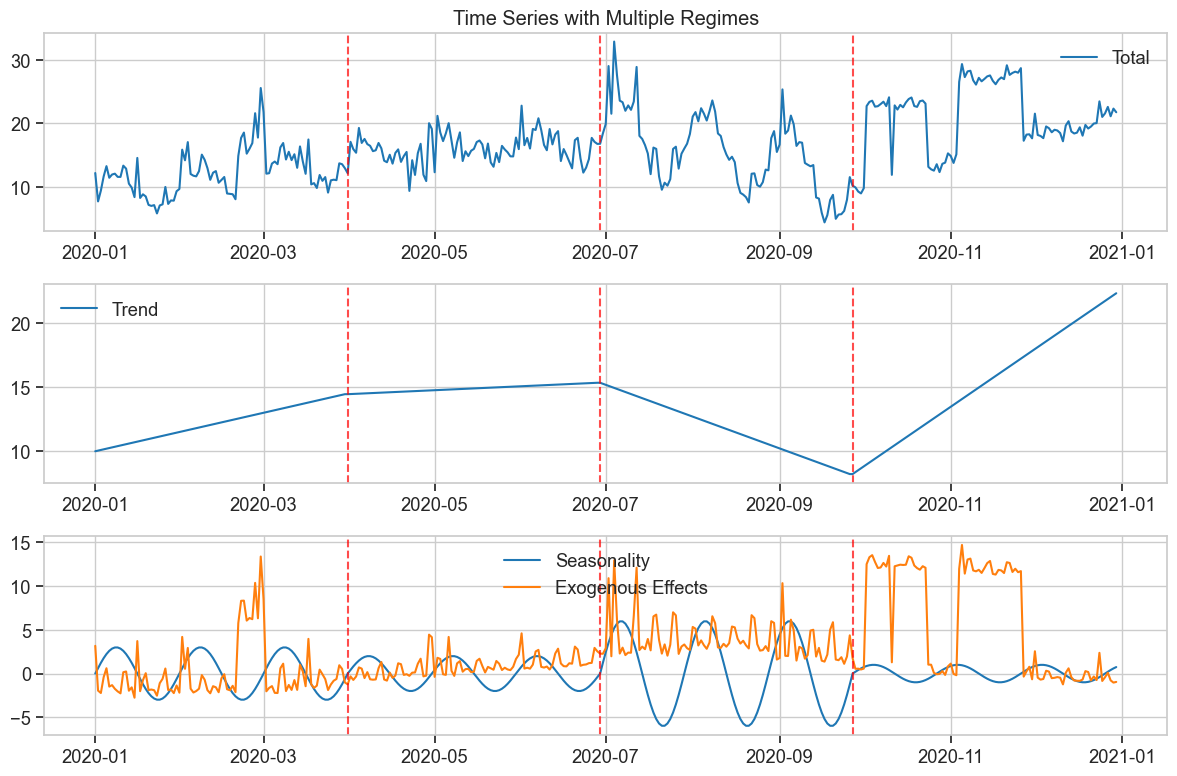

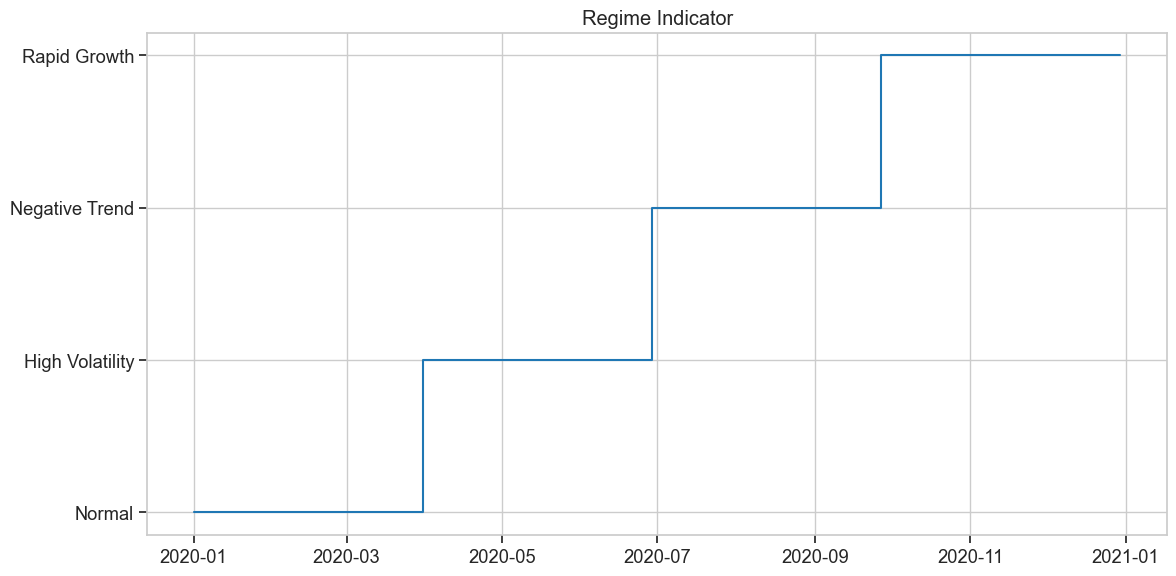

In [11]:
# Cell 9: Dataset with Multiple Regimes and Structural Breaks

# Parameters
noise_std = 0.5

# Define regimes
n_regimes = 4
regime_lengths = [90, 90, 90, 95]  # Adding up to 365 days
regime_boundaries = np.cumsum(regime_lengths)
regime_boundaries = np.insert(regime_boundaries, 0, 0)

# Set different parameters for each regime
regime_params = {
    # regime 0: normal
    0: {
        'trend_slope': 0.05,
        'seasonal_amplitude': 3,
        'seasonal_period': 30,
        'temp_effect_coef': -0.2,
        'weekend_effect_coef': 2.0,
        'holiday_effect_coef': 5.0,
        'promotion_effect_coef': 8.0,
    },
    # regime 1: high volatility with weak trend
    1: {
        'trend_slope': 0.01,
        'seasonal_amplitude': 2,
        'seasonal_period': 30,
        'temp_effect_coef': -0.15,
        'weekend_effect_coef': 1.5,
        'holiday_effect_coef': 4.0,
        'promotion_effect_coef': 6.0,
        'volatility_multiplier': 3.0,  # Higher volatility
    },
    # regime 2: strong seasonality with negative trend
    2: {
        'trend_slope': -0.08,
        'seasonal_amplitude': 6,
        'seasonal_period': 30,
        'temp_effect_coef': -0.3,
        'weekend_effect_coef': 3.0,
        'holiday_effect_coef': 7.0,
        'promotion_effect_coef': 9.0,
    },
    # regime 3: rapid growth with diminished seasonality
    3: {
        'trend_slope': 0.15,
        'seasonal_amplitude': 1,
        'seasonal_period': 30,
        'temp_effect_coef': -0.1,
        'weekend_effect_coef': 1.0,
        'holiday_effect_coef': 3.0,
        'promotion_effect_coef': 12.0,
    }
}

# Initialize arrays for components
trend = np.zeros(n_timesteps)
seasonality = np.zeros(n_timesteps)
temp_effect = np.zeros(n_timesteps)
weekend_effect = np.zeros(n_timesteps)
holiday_effect = np.zeros(n_timesteps)
promotion_effect = np.zeros(n_timesteps)
noise = np.zeros(n_timesteps)
regime_indicator = np.zeros(n_timesteps)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi/3)
is_promotion = get_promotions(num_promotions=5, avg_duration=12)

# Fill components by regime
for regime in range(n_regimes):
    start_idx = regime_boundaries[regime]
    end_idx = regime_boundaries[regime + 1]
    regime_length = end_idx - start_idx
    local_time = np.arange(regime_length)
    
    # Get parameters for this regime
    params = regime_params[regime]
    
    # Set components for this regime
    # Trend (with smooth transition at regime boundaries)
    if regime == 0:
        base_level = 10
    else:
        # Use last value from previous regime as starting point
        base_level = trend[start_idx - 1]
    
    trend[start_idx:end_idx] = base_level + params['trend_slope'] * local_time
    
    # Seasonality
    seasonality[start_idx:end_idx] = params['seasonal_amplitude'] * \
                                   np.sin(2 * np.pi * local_time / params['seasonal_period'])
    
    # Exogenous effects with regime-specific coefficients
    temp_effect[start_idx:end_idx] = params['temp_effect_coef'] * (temperature[start_idx:end_idx] - 15)
    weekend_effect[start_idx:end_idx] = params['weekend_effect_coef'] * is_weekend[start_idx:end_idx]
    holiday_effect[start_idx:end_idx] = params['holiday_effect_coef'] * is_holiday[start_idx:end_idx]
    promotion_effect[start_idx:end_idx] = params['promotion_effect_coef'] * is_promotion[start_idx:end_idx]
    
    # Noise (potentially with different volatility by regime)
    vol_multiplier = params.get('volatility_multiplier', 1.0)
    noise[start_idx:end_idx] = np.random.randn(regime_length) * noise_std * vol_multiplier
    
    # Mark the regime
    regime_indicator[start_idx:end_idx] = regime

# Combine effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_regimes = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'regime': regime_indicator,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Multiple regimes dataset:")
df_regimes.head()

# Quick visualization
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_regimes.index, df_regimes['value'], label='Total')
# Add vertical lines at regime boundaries
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.title('Time Series with Multiple Regimes')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_regimes.index, df_regimes['trend'], label='Trend')
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_regimes.index, df_regimes['seasonality'], label='Seasonality')
plt.plot(df_regimes.index, df_regimes['exog_effects'], label='Exogenous Effects')
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the different regimes
plt.figure(figsize=(12, 6))
plt.step(df_regimes.index, df_regimes['regime'], where='post')
plt.title('Regime Indicator')
plt.yticks([0, 1, 2, 3], ['Normal', 'High Volatility', 'Negative Trend', 'Rapid Growth'])
plt.tight_layout()
plt.show()

Negative trend dataset:


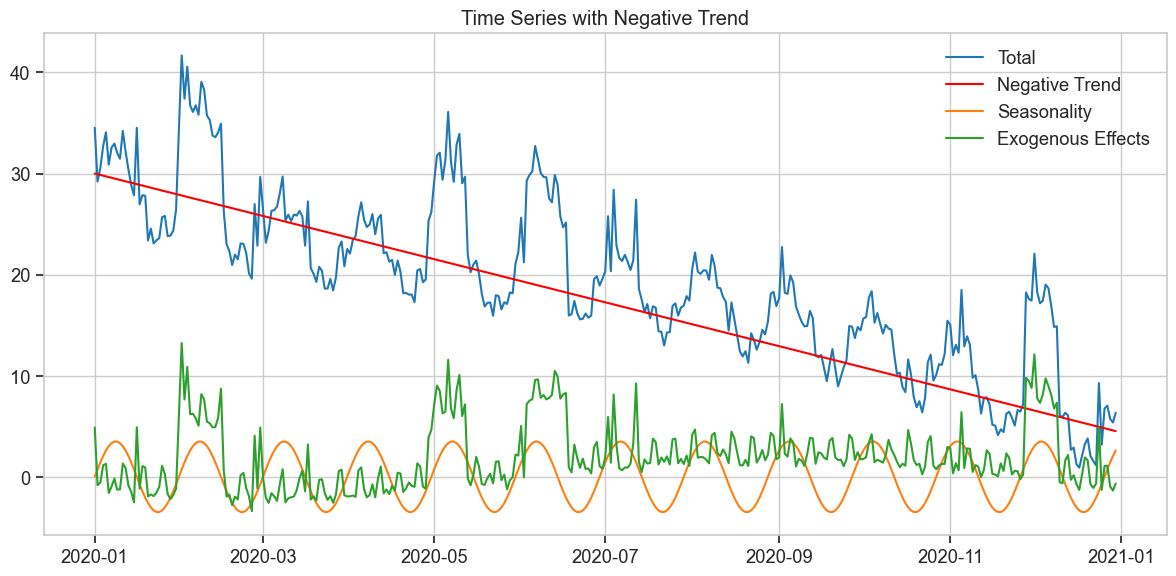

In [14]:
# Cell 12: Dataset with Negative Trend

# Parameters - negative trend
trend_slope = -0.07  # Downward trend
seasonal_amplitude = 3.5  # Moderate seasonality
seasonal_period = 30
noise_std = 0.45

# Generate base components
initial_level = 30  # Higher starting point to avoid negative values
trend = initial_level + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=9, phase_shift=np.pi/6)
is_promotion = get_promotions(num_promotions=4, avg_duration=14)

# Exogenous effects
temp_effect = -0.22 * (temperature - 15)
weekend_effect = 2.2 * is_weekend
holiday_effect = 5.5 * is_holiday
promotion_effect = 7.5 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_negative_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)


# Display the first few rows
print("Negative trend dataset:")
df_negative_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_negative_trend.index, df_negative_trend['value'], label='Total')
plt.plot(df_negative_trend.index, df_negative_trend['trend'], label='Negative Trend', color='red')
plt.plot(df_negative_trend.index, df_negative_trend['seasonality'], label='Seasonality')
plt.plot(df_negative_trend.index, df_negative_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Negative Trend')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df = df_original

## LSTM Single Step Testing

Epoch [5/50], Loss: 0.0211
Epoch [10/50], Loss: 0.0127
Epoch [15/50], Loss: 0.0110
Epoch [20/50], Loss: 0.0078
Epoch [25/50], Loss: 0.0087
Epoch [30/50], Loss: 0.0075
Epoch [35/50], Loss: 0.0076
Epoch [40/50], Loss: 0.0074
Epoch [45/50], Loss: 0.0069
Epoch [50/50], Loss: 0.0066
Training completed in 4.32 seconds

LSTM Performance Metrics:
Test MSE: 9.4845
Test RMSE: 3.0797
Test MAE: 2.4662
Inference time: 0.0101 seconds


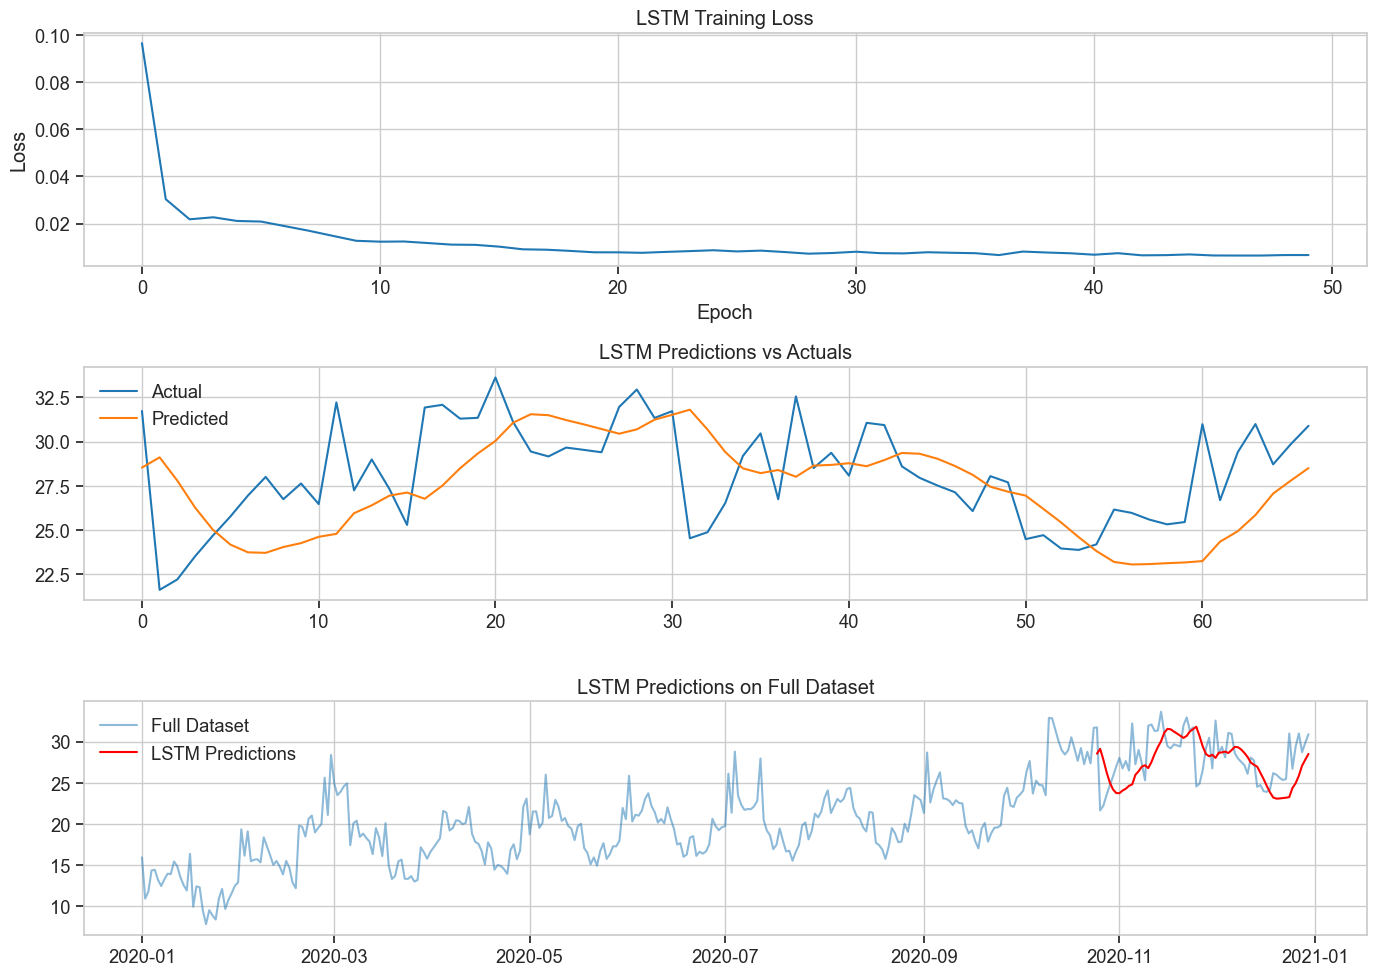

In [19]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from models.lstm import LSTMModel

# Create sequences function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 30  # Use 30 days of history to predict the next day
lookforward = 7  # Predict 7 days ahead (for multi-step forecasting)
test_ratio = 0.2  # 20% test split

# Scale the data
lstm_scaler = MinMaxScaler()
lstm_values_scaled = lstm_scaler.fit_transform(df[['value']].values)

# Create sequences
lstm_X, lstm_y = create_sequences(lstm_values_scaled, sequence_length)

# Split into train and test sets
lstm_test_size = int(len(lstm_X) * test_ratio)
lstm_train_size = len(lstm_X) - lstm_test_size
lstm_X_train, lstm_X_test = lstm_X[:lstm_train_size], lstm_X[lstm_train_size:]
lstm_y_train, lstm_y_test = lstm_y[:lstm_train_size], lstm_y[lstm_train_size:]

# Convert to PyTorch tensors
lstm_X_train = torch.FloatTensor(lstm_X_train)
lstm_y_train = torch.FloatTensor(lstm_y_train)
lstm_X_test = torch.FloatTensor(lstm_X_test)
lstm_y_test = torch.FloatTensor(lstm_y_test)

# Create data loaders
batch_size = 32
lstm_train_dataset = TensorDataset(lstm_X_train, lstm_y_train)
lstm_test_dataset = TensorDataset(lstm_X_test, lstm_y_test)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=batch_size, shuffle=True)
lstm_test_loader = DataLoader(lstm_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 1  # Single feature (value)
lstm_model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2)
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Training
num_epochs = 50
lstm_train_losses = []
lstm_start_time = time.time()

for epoch in range(num_epochs):
    lstm_model.train()
    lstm_running_loss = 0.0
    
    for inputs, targets in lstm_train_loader:
        # Forward pass
        lstm_outputs = lstm_model(inputs)
        lstm_loss = lstm_criterion(lstm_outputs, targets)
        
        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()
        
        lstm_running_loss += lstm_loss.item()
    
    lstm_avg_loss = lstm_running_loss / len(lstm_train_loader)
    lstm_train_losses.append(lstm_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {lstm_avg_loss:.4f}')

lstm_training_time = time.time() - lstm_start_time
print(f"Training completed in {lstm_training_time:.2f} seconds")

# Evaluation
lstm_model.eval()
lstm_predictions = []
lstm_actuals = []
lstm_inference_start = time.time()

with torch.no_grad():
    for inputs, targets in lstm_test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions.append(outputs.numpy())
        lstm_actuals.append(targets.numpy())
    
    # Concatenate batches
    lstm_predictions = np.concatenate(lstm_predictions)
    lstm_actuals = np.concatenate(lstm_actuals)
    
    # Inverse transform to original scale
    lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions)
    lstm_actuals = lstm_scaler.inverse_transform(lstm_actuals)

lstm_inference_time = time.time() - lstm_inference_start

# Calculate metrics
lstm_mse = mean_squared_error(lstm_actuals, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(lstm_actuals, lstm_predictions)

print(f"\nLSTM Performance Metrics:")
print(f"Test MSE: {lstm_mse:.4f}")
print(f"Test RMSE: {lstm_rmse:.4f}")
print(f"Test MAE: {lstm_mae:.4f}")
print(f"Inference time: {lstm_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(lstm_train_losses)
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(lstm_actuals, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('LSTM Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
lstm_pred_dates = df.index[sequence_length + lstm_train_size:sequence_length + lstm_train_size + len(lstm_predictions)]
plt.plot(lstm_pred_dates, lstm_predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
lstm_results = {
    'model': 'LSTM',
    'mse': lstm_mse,
    'rmse': lstm_rmse,
    'mae': lstm_mae,
    'training_time': lstm_training_time,
    'inference_time': lstm_inference_time,
    'predictions': lstm_predictions,
    'actuals': lstm_actuals,
    'prediction_dates': lstm_pred_dates
}

## NBEATsX V7 Test Single Step

Preparing data for NBEATSx model...
Input shape: (335, 30)
Target shape: (335,)
Exogenous shape: (335, 31, 10)
Data prepared: 268 training samples, 67 test samples
Starting training...


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Epoch [5/50], Loss: 0.3917
Epoch [10/50], Loss: 0.1927
Epoch [15/50], Loss: 0.1639
Epoch [20/50], Loss: 0.1110
Epoch [25/50], Loss: 0.1204
Epoch [30/50], Loss: 0.0892
Epoch [35/50], Loss: 0.0656
Epoch [40/50], Loss: 0.0738
Epoch [45/50], Loss: 0.0780
Epoch [50/50], Loss: 0.0590
Training completed in 104.65 seconds

NBEATSx Performance Metrics:
Test MSE: 37.6365
Test RMSE: 6.1349
Test MAE: 5.0902
Training time: 104.65 seconds
Inference time: 0.7109 seconds


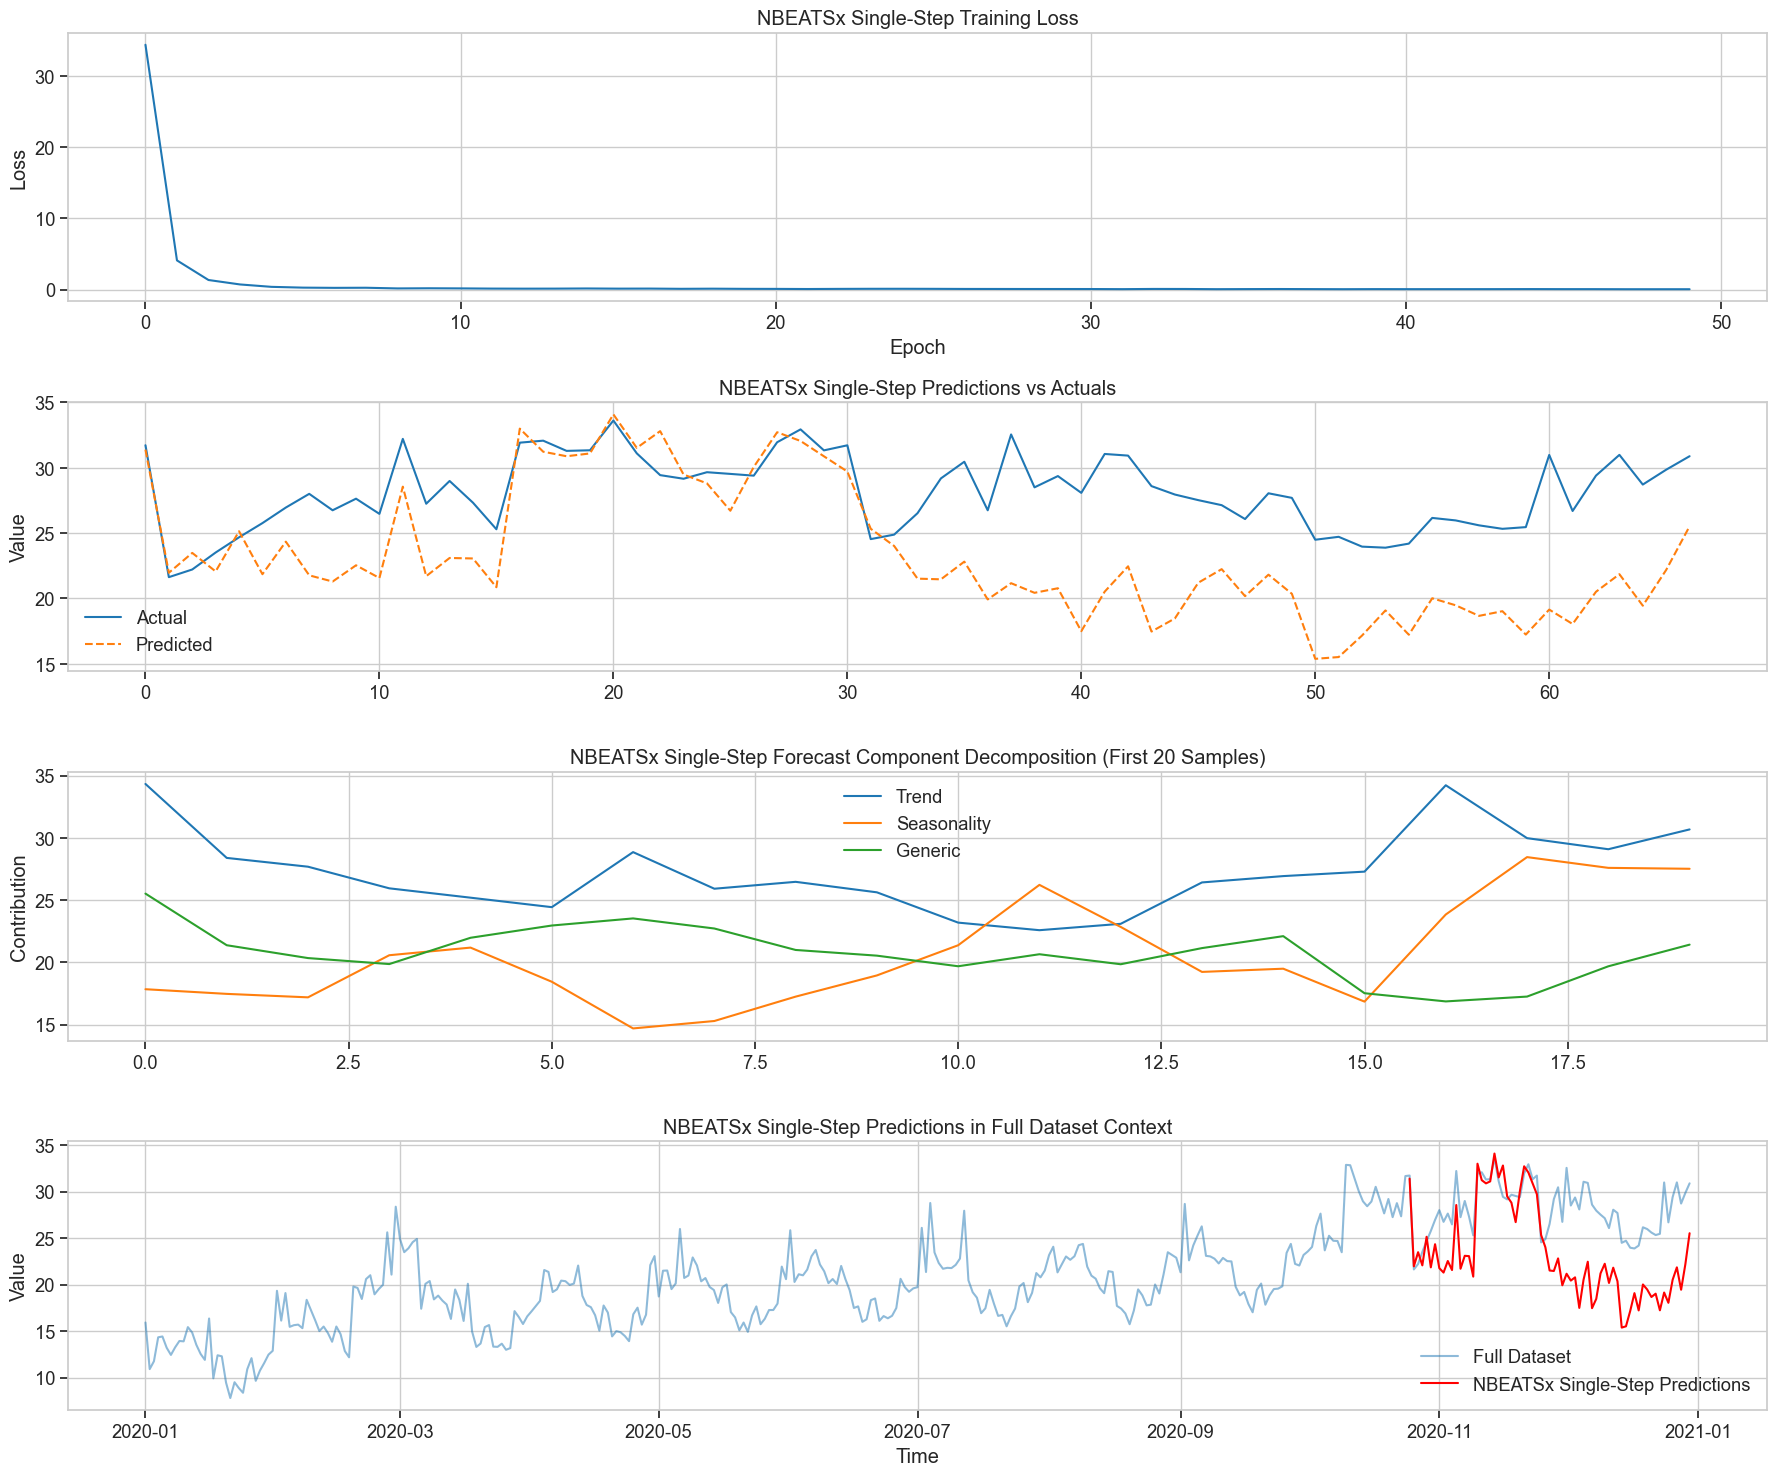


Model Comparison:
                 Model        MSE      RMSE       MAE  Training Time (s)  \
0                 LSTM   9.484469  3.079687  2.466249           4.317877   
1  NBEATSx Single-Step  37.636528  6.134862  5.090195         104.646028   

   Inference Time (s)  
0            0.010109  
1            0.710917  


In [20]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
import matplotlib.pyplot as plt
from models.nbeatsx_v7 import NBEATSx

# Parameters - modified for single-step forecasting
nbeatsx_lookback = 30  # Use 30 days of history
nbeatsx_forecast_horizon = 1  # Single-step: predict only 1 day ahead instead of 7
nbeatsx_test_ratio = 0.2

# Prepare data for NBEATSx
print("Preparing data for NBEATSx model...")

# Separate target and exogenous variables
target_col = 'value'
exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
             'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos']

# Scale target variable
nbeatsx_scaler_y = StandardScaler()
nbeatsx_y_scaled = nbeatsx_scaler_y.fit_transform(df[[target_col]].values)

# Scale exogenous variables
nbeatsx_scaler_x = StandardScaler()
nbeatsx_exog_scaled = nbeatsx_scaler_x.fit_transform(df[exog_cols].values)

# Modified to create sequences for single-step forecasting
def create_nbeatsx_sequences(data, exog_data, lookback, horizon=1):
    X, y = [], []
    exog = []
    
    for i in range(len(data) - lookback - horizon + 1):
        # Input sequence
        X.append(data[i:i+lookback, 0])
        
        # Target is now a single value
        y.append(data[i+lookback, 0])
        
        # Exogenous variables for input and just one step ahead
        exog.append(exog_data[i:i+lookback+1])
    
    return np.array(X), np.array(y), np.array(exog)

# Create sequences
nbeatsx_X, nbeatsx_y, nbeatsx_exog = create_nbeatsx_sequences(
    nbeatsx_y_scaled, nbeatsx_exog_scaled, nbeatsx_lookback, nbeatsx_forecast_horizon)

print(f"Input shape: {nbeatsx_X.shape}")
print(f"Target shape: {nbeatsx_y.shape}")
print(f"Exogenous shape: {nbeatsx_exog.shape}")

# Split into train and test sets
nbeatsx_test_size = int(len(nbeatsx_X) * nbeatsx_test_ratio)
nbeatsx_train_size = len(nbeatsx_X) - nbeatsx_test_size

nbeatsx_X_train = nbeatsx_X[:nbeatsx_train_size]
nbeatsx_y_train = nbeatsx_y[:nbeatsx_train_size]
nbeatsx_exog_train = nbeatsx_exog[:nbeatsx_train_size]

nbeatsx_X_test = nbeatsx_X[nbeatsx_train_size:]
nbeatsx_y_test = nbeatsx_y[nbeatsx_train_size:]
nbeatsx_exog_test = nbeatsx_exog[nbeatsx_train_size:]

# Convert to PyTorch tensors
nbeatsx_X_train_tensor = torch.FloatTensor(nbeatsx_X_train)
nbeatsx_y_train_tensor = torch.FloatTensor(nbeatsx_y_train)
nbeatsx_exog_train_tensor = torch.FloatTensor(nbeatsx_exog_train)

nbeatsx_X_test_tensor = torch.FloatTensor(nbeatsx_X_test)
nbeatsx_y_test_tensor = torch.FloatTensor(nbeatsx_y_test)
nbeatsx_exog_test_tensor = torch.FloatTensor(nbeatsx_exog_test)

# Create data loaders
batch_size = 32
nbeatsx_train_dataset = TensorDataset(nbeatsx_X_train_tensor, nbeatsx_y_train_tensor, nbeatsx_exog_train_tensor)
nbeatsx_test_dataset = TensorDataset(nbeatsx_X_test_tensor, nbeatsx_y_test_tensor, nbeatsx_exog_test_tensor)

nbeatsx_train_loader = DataLoader(nbeatsx_train_dataset, batch_size=batch_size, shuffle=True)
nbeatsx_test_loader = DataLoader(nbeatsx_test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data prepared: {nbeatsx_train_size} training samples, {nbeatsx_test_size} test samples")

# Initialize the NBEATSx model - modified for single-step forecasting
exog_channels = nbeatsx_exog.shape[2]  # Number of exogenous features

# Initialize the enhanced NBEATSx model with forecast_size=1
nbeatsx_model = NBEATSx(
    input_size=nbeatsx_lookback,
    forecast_size=nbeatsx_forecast_horizon,  # Now set to 1
    exog_channels=exog_channels,
    stack_types=['trend', 'seasonality', 'generic'],
    num_blocks_per_stack=[2, 2, 1],
    hidden_units=128,
    layers=3,
    basis_kwargs={
        'degree': 3,
        'harmonics': 5,
        'tcn_levels': 3,
        'tcn_kernel_size': 3
    },
    dropout=0.1,
    exog_mode='tcn'
)

# Loss function and optimizer
nbeatsx_criterion = nn.MSELoss()
nbeatsx_optimizer = optim.Adam(nbeatsx_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeatsx_train_losses = []
nbeatsx_start_time = time.time()

print("Starting training...")
for epoch in range(num_epochs):
    nbeatsx_model.train()
    nbeatsx_running_loss = 0.0
    
    for inputs, targets, exog in nbeatsx_train_loader:
        # Forward pass - reshape targets for comparison with single-step outputs
        nbeatsx_outputs = nbeatsx_model(inputs, exog)
        # Reshape outputs to match targets (from [batch_size, 1] to [batch_size])
        nbeatsx_outputs = nbeatsx_outputs.squeeze()
        nbeatsx_loss = nbeatsx_criterion(nbeatsx_outputs, targets)
        
        # Backward and optimize
        nbeatsx_optimizer.zero_grad()
        nbeatsx_loss.backward()
        nbeatsx_optimizer.step()
        
        nbeatsx_running_loss += nbeatsx_loss.item()
    
    nbeatsx_avg_loss = nbeatsx_running_loss / len(nbeatsx_train_loader)
    nbeatsx_train_losses.append(nbeatsx_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeatsx_avg_loss:.4f}')

nbeatsx_training_time = time.time() - nbeatsx_start_time
print(f"Training completed in {nbeatsx_training_time:.2f} seconds")

# Evaluation with component decomposition
nbeatsx_model.eval()
nbeatsx_predictions = []
nbeatsx_actuals = []
nbeatsx_components = []
nbeatsx_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeatsx_test_loader:
        # Get prediction with component decomposition
        outputs, components = nbeatsx_model(inputs, exog, return_decomposition=True)
        
        # Store predictions - squeeze to convert from [batch_size, 1] to [batch_size]
        nbeatsx_predictions.append(outputs.squeeze().numpy())
        nbeatsx_actuals.append(targets.numpy())
        
        # Store components for the first batch only (for visualization)
        if len(nbeatsx_components) == 0:
            nbeatsx_components = [comp.squeeze().numpy() for comp in components]

nbeatsx_inference_time = time.time() - nbeatsx_inference_start

# Concatenate batches - Fix the concatenation to handle batch structure properly
nbeatsx_predictions = np.concatenate(nbeatsx_predictions)
nbeatsx_actuals = np.concatenate(nbeatsx_actuals)

# Reshape for inverse scaling
nbeatsx_predictions_reshaped = nbeatsx_predictions.reshape(-1, 1)
nbeatsx_actuals_reshaped = nbeatsx_actuals.reshape(-1, 1)

# Inverse transform to original scale
nbeatsx_predictions_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_predictions_reshaped).flatten()
nbeatsx_actuals_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_actuals_reshaped).flatten()

# Calculate metrics
nbeatsx_mse = mean_squared_error(nbeatsx_actuals_orig, nbeatsx_predictions_orig)
nbeatsx_rmse = np.sqrt(nbeatsx_mse)
nbeatsx_mae = mean_absolute_error(nbeatsx_actuals_orig, nbeatsx_predictions_orig)

print(f"\nNBEATSx Performance Metrics:")
print(f"Test MSE: {nbeatsx_mse:.4f}")
print(f"Test RMSE: {nbeatsx_rmse:.4f}")
print(f"Test MAE: {nbeatsx_mae:.4f}")
print(f"Training time: {nbeatsx_training_time:.2f} seconds")
print(f"Inference time: {nbeatsx_inference_time:.4f} seconds")

# Calculate prediction dates
start_idx = nbeatsx_lookback + nbeatsx_train_size
end_idx = min(start_idx + len(nbeatsx_predictions_orig), len(df.index))
nbeatsx_pred_dates = df.index[start_idx:end_idx]

# Plot training loss, predictions, and context for NBEATSx single-step
plt.figure(figsize=(18, 15))

# 1. Plot training loss over epochs
plt.subplot(4, 1, 1)
plt.plot(nbeatsx_train_losses, label='Training Loss')
plt.title('NBEATSx Single-Step Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 2. Plot predictions vs actuals
plt.subplot(4, 1, 2)
plt.plot(nbeatsx_actuals_orig, label='Actual')
plt.plot(nbeatsx_predictions_orig, label='Predicted', linestyle='--')
plt.title('NBEATSx Single-Step Predictions vs Actuals')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 3. Plot component-wise decomposition for first few samples
plt.subplot(4, 1, 3)
component_labels = ['Trend', 'Seasonality', 'Generic']
for i, comp_label in enumerate(component_labels):
    if i < len(nbeatsx_components):
        # Get the first few components for visualization
        comp_values = nbeatsx_components[i][:20]  # First 20 values
        # Reshape for inverse transform
        comp_reshaped = comp_values.reshape(-1, 1)
        # Inverse transform
        comp_orig = nbeatsx_scaler_y.inverse_transform(comp_reshaped).flatten()
        plt.plot(comp_orig, label=comp_label)

plt.title('NBEATSx Single-Step Forecast Component Decomposition (First 20 Samples)')
plt.ylabel('Contribution')
plt.legend()
plt.grid(True)

# 4. Plot predictions in context of the original full dataset
plt.subplot(4, 1, 4)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
nbeatsx_pred_dates = df.index[nbeatsx_lookback + nbeatsx_train_size:nbeatsx_lookback + nbeatsx_train_size + len(nbeatsx_predictions_orig)]
plt.plot(nbeatsx_pred_dates, nbeatsx_predictions_orig, label='NBEATSx Single-Step Predictions', color='red')
plt.title('NBEATSx Single-Step Predictions in Full Dataset Context')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store results for comparison
nbeatsx_results = {
    'model': 'NBEATSx Single-Step',
    'mse': nbeatsx_mse,
    'rmse': nbeatsx_rmse,
    'mae': nbeatsx_mae,
    'training_time': nbeatsx_training_time,
    'inference_time': nbeatsx_inference_time,
    'predictions': nbeatsx_predictions_orig,
    'actuals': nbeatsx_actuals_orig
}

# Create a comparison with LSTM results (assuming lstm_results exists)
try:
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'NBEATSx Single-Step'],
        'MSE': [lstm_results['mse'], nbeatsx_results['mse']],
        'RMSE': [lstm_results['rmse'], nbeatsx_results['rmse']],
        'MAE': [lstm_results['mae'], nbeatsx_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], nbeatsx_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], nbeatsx_results['inference_time']]
    })
    print("\nModel Comparison:")
    print(comparison_df)
except NameError:
    print("\nNo LSTM results found for comparison.")

## DeepAR V3 Single Step Test

Starting DeepAR training...
Epoch [1/50], Batch [0/9], Loss: 1.4681
Epoch [2/50], Batch [0/9], Loss: 1.0977
Epoch [3/50], Batch [0/9], Loss: 0.7553
Epoch [4/50], Batch [0/9], Loss: 0.6363
Epoch [5/50], Batch [0/9], Loss: 0.4967
Epoch [5/50], Loss: 0.3384
Epoch [6/50], Batch [0/9], Loss: 0.2342
Epoch [7/50], Batch [0/9], Loss: 0.1151
Epoch [8/50], Batch [0/9], Loss: -0.0151
Epoch [9/50], Batch [0/9], Loss: 0.0470
Epoch [10/50], Batch [0/9], Loss: -0.2111
Epoch [10/50], Loss: -0.2053
Epoch [11/50], Batch [0/9], Loss: -0.2271
Epoch [12/50], Batch [0/9], Loss: -0.3170
Epoch [13/50], Batch [0/9], Loss: -0.4525
Epoch [14/50], Batch [0/9], Loss: -0.4999
Epoch [15/50], Batch [0/9], Loss: -0.5432
Epoch [15/50], Loss: -0.6303
Epoch [16/50], Batch [0/9], Loss: -0.6618
Epoch [17/50], Batch [0/9], Loss: -0.6562
Epoch [18/50], Batch [0/9], Loss: -0.8018
Epoch [19/50], Batch [0/9], Loss: -0.7505
Epoch [20/50], Batch [0/9], Loss: -0.7245
Epoch [20/50], Loss: -0.6612
Epoch [21/50], Batch [0/9], Loss: -

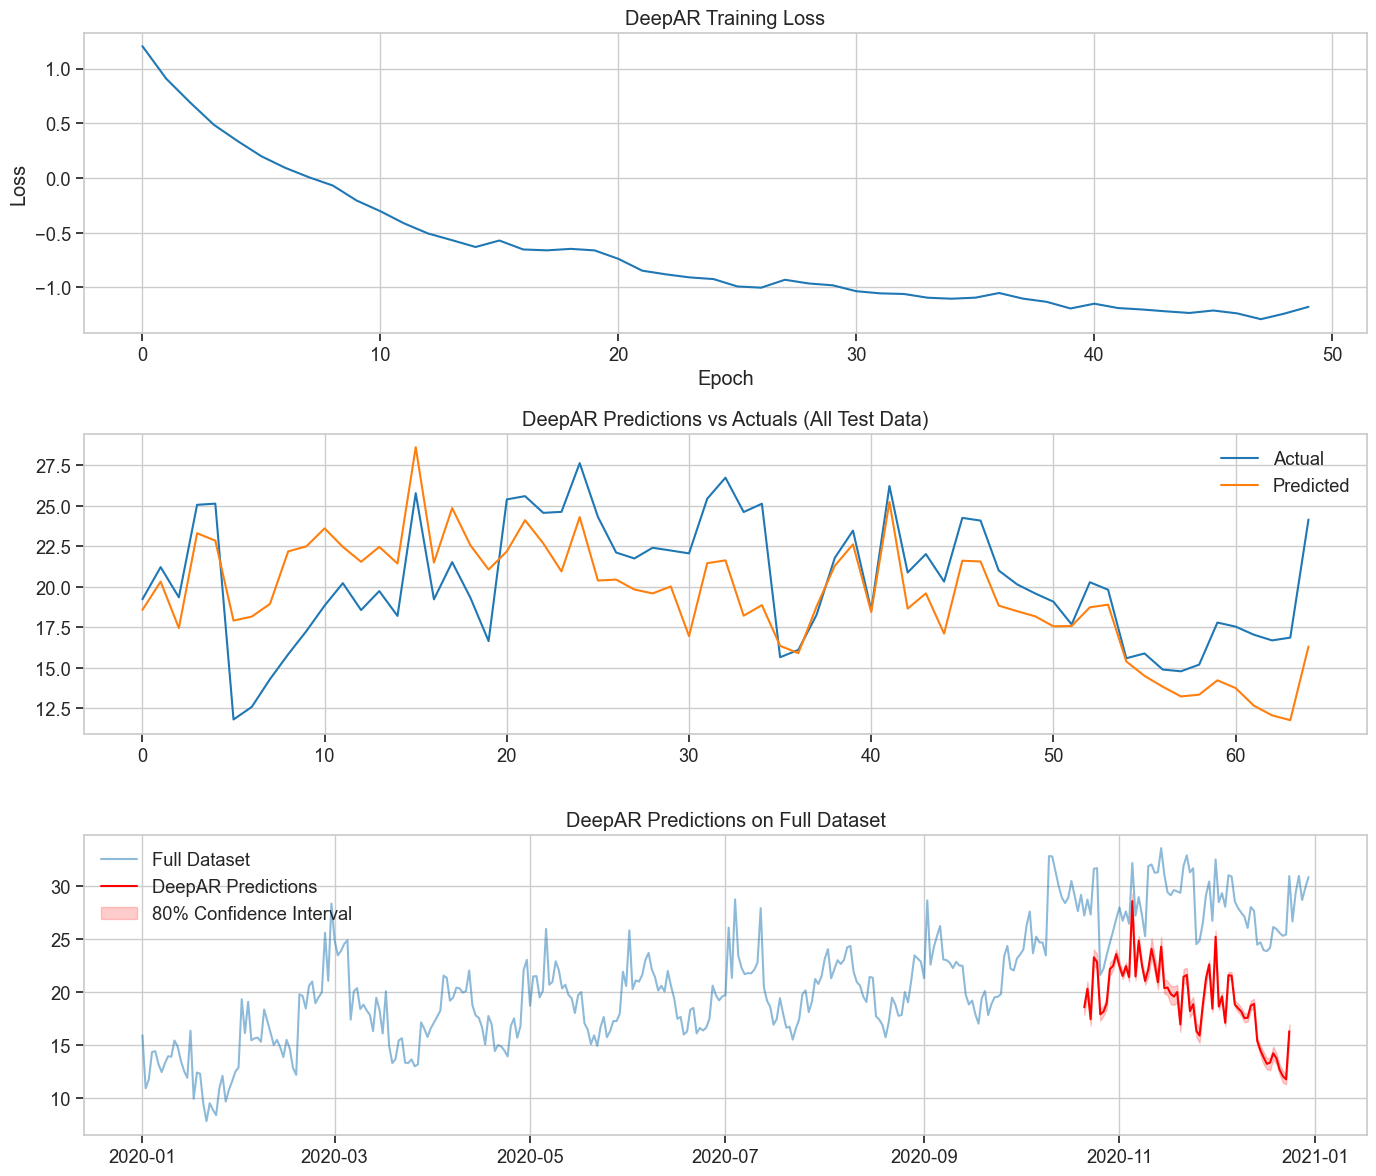


Model Comparison:
    Model        MSE      RMSE       MAE  Training Time (s)  \
0    LSTM   9.484469  3.079687  2.466249           4.317877   
1  DeepAR  11.064945  3.326401  2.799339           8.689473   

   Inference Time (s)  
0            0.010109  
1            2.685679  


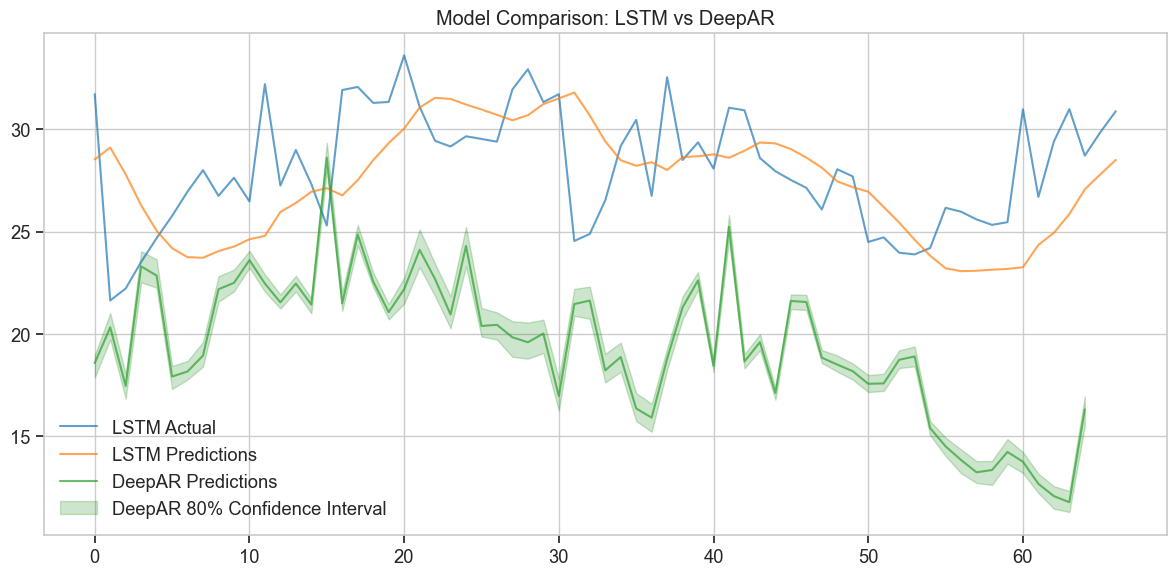

In [21]:
# Fix the dimensions mismatch issue in the plotting code
# Test DeepAR model on synthetic data with proper None handling
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import the DeepAR model
from models.deepar_v3 import DeepARModel

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a custom collate function to handle None values
def custom_collate(batch):
    elem = batch[0]
    result = {}
    
    for key in elem:
        if all(batch[i][key] is not None for i in range(len(batch))):
            result[key] = torch.stack([batch[i][key] for i in range(len(batch))])
        else:
            # If this field contains None, don't include it in the result
            result[key] = None
            
    return result

# Custom dataset for DeepAR
class TimeSeriesDataset(Dataset):
    def __init__(self, df, seq_length, pred_length, target_col='value', time_cols=None):
        self.seq_length = seq_length
        self.pred_length = pred_length
        self.target_col = target_col
        
        # Scale the target variable
        self.target_scaler = StandardScaler()
        target_data = df[target_col].values.reshape(-1, 1)
        self.scaled_target = self.target_scaler.fit_transform(target_data)
        
        # Process time features if provided
        if time_cols:
            time_features = df[time_cols].values
            # Scale time features
            self.time_scaler = StandardScaler()
            self.scaled_time_features = self.time_scaler.fit_transform(time_features)
            self.num_time_features = len(time_cols)
        else:
            self.scaled_time_features = None
            self.num_time_features = 0
        
        # Store indices for slicing
        total_length = len(df)
        self.indices = []
        for i in range(total_length - seq_length - pred_length + 1):
            self.indices.append((i, i + seq_length + pred_length))
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        start_idx, end_idx = self.indices[idx]
        
        # Get target sequence
        target_seq = self.scaled_target[start_idx:end_idx].squeeze()
        
        # Get time features if available
        if self.scaled_time_features is not None:
            time_feat_seq = self.scaled_time_features[start_idx:end_idx]
            time_feat_tensor = torch.FloatTensor(time_feat_seq)
        else:
            time_feat_tensor = None
        
        # No static features in this dataset
        static_feat_tensor = None
        
        return {
            'y': torch.FloatTensor(target_seq),
            'time_features': time_feat_tensor,
            'static_features': None  # Explicitly set to None since we don't have static features
        }

# Parameters
sequence_length = 30  # Same as LSTM model for fair comparison
pred_length = 7       # Predict 7 days ahead
test_ratio = 0.2      # 20% test split

# Define which columns to use as time features
time_feature_cols = [
    'temperature', 'day_of_week_sin', 'day_of_week_cos', 
    'day_of_month_sin', 'day_of_month_cos', 'month_sin', 'month_cos',
    'is_weekend', 'is_holiday', 'is_promotion'
]

# Calculate split indices
total_size = len(df) - sequence_length - pred_length + 1
test_size = int(total_size * test_ratio)
train_size = total_size - test_size

# Create train and test dataframes with proper indexing
train_end_idx = train_size + sequence_length + pred_length - 1
train_df = df.iloc[:train_end_idx+1]  # Include one extra point to ensure proper sequence generation

# Modified: Use all test data 
test_df = df.iloc[train_size:]

# Create datasets
train_dataset = TimeSeriesDataset(train_df, sequence_length, pred_length, 
                               target_col='value', 
                               time_cols=time_feature_cols)

test_dataset = TimeSeriesDataset(test_df, sequence_length, pred_length, 
                             target_col='value', 
                             time_cols=time_feature_cols)

# Create data loaders with custom collate function
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
# Modified: Use a smaller batch size for test to handle all instances
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=custom_collate)

# Initialize DeepAR model
model_config = {
    'num_time_features': len(time_feature_cols),
    'num_static_features': 0,  # No static features in this dataset
    'embedding_dim': 32,
    'hidden_size': 64,
    'num_layers': 2,
    'dropout': 0.1,
    'likelihood': 'gaussian',
    'seq_len': sequence_length,
    'prediction_len': pred_length
}

# Initialize model
deepar_model = DeepARModel(**model_config)

# Setup optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(deepar_model.parameters(), lr=learning_rate)

# Training
import time
num_epochs = 50
train_losses = []
start_time = time.time()

print("Starting DeepAR training...")
for epoch in range(num_epochs):
    deepar_model.train()
    epoch_loss = 0.0
    batch_count = 0
    
    for batch_idx, batch in enumerate(train_loader):
        y = batch['y']
        time_features = batch['time_features']
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Compute loss
        loss = deepar_model.loss(
            y=y,
            time_features=time_features,
            static_features=None  # No static features
        )
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        batch_count += 1
        
        if batch_idx % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    if batch_count > 0:
        avg_loss = epoch_loss / batch_count
        train_losses.append(avg_loss)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Evaluation
# Fix the dimensionality issues in the evaluation section
deepar_model.eval()
predictions = []
actuals = []
forecast_samples_list = []
prediction_dates = []  # Store dates for each prediction point
inference_start = time.time()

# Track the current starting date for prediction windows
current_idx = train_size

with torch.no_grad():
    for batch in test_loader:
        y = batch['y']
        time_features = batch['time_features']
        
        # Forward pass - get predictions
        outputs = deepar_model.forward(
            y=y[:, :sequence_length],
            time_features=time_features[:, :sequence_length] if time_features is not None else None,
            static_features=None,
            future_time_features=time_features[:, sequence_length:] if time_features is not None else None,
            training=False
        )
        
        # Get multiple samples for uncertainty estimation
        samples = deepar_model.sample(
            y=y[:, :sequence_length],
            num_samples=100,
            time_features=time_features[:, :sequence_length] if time_features is not None else None,
            static_features=None,
            future_time_features=time_features[:, sequence_length:] if time_features is not None else None
        )
        
        # Store predictions and actuals - handle dimensionality properly
        pred_mean = outputs['mean'].detach().numpy()
        act = y[:, sequence_length:].detach().numpy()
        sam = samples.detach().numpy()
        
        # For each instance in the batch
        for i in range(len(pred_mean)):
            # Store prediction and actual for one-step ahead forecast (like LSTM)
            predictions.append(pred_mean[i, 0])
            actuals.append(act[i, 0])
            
            # Store the date for this prediction
            prediction_date = df.index[current_idx + sequence_length]
            prediction_dates.append(prediction_date)
            
            # Move to next time step
            current_idx += 1
        
        # Also keep the full samples for uncertainty bounds
        forecast_samples_list.append(sam)

inference_time = time.time() - inference_start

# Convert lists to arrays
predictions = np.array(predictions).reshape(-1, 1)
actuals = np.array(actuals).reshape(-1, 1)
prediction_dates = np.array(prediction_dates)

# Reshape arrays properly for inverse transform
scaler = train_dataset.target_scaler

# Inverse transform predictions and actuals
predictions_original = scaler.inverse_transform(predictions)
actuals_original = scaler.inverse_transform(actuals)

# Handle forecast samples for uncertainty bounds
lower_bounds = []
upper_bounds = []

# Process each batch of samples
for samples_batch in forecast_samples_list:
    batch_size = samples_batch.shape[0]
    
    for i in range(batch_size):
        # Get samples for the first prediction step (like LSTM)
        samples = samples_batch[i, 0, :].reshape(-1, 1)
        samples_original = scaler.inverse_transform(samples)
        
        # Calculate quantiles
        lower = np.quantile(samples_original, 0.1)
        upper = np.quantile(samples_original, 0.9)
        
        lower_bounds.append(lower)
        upper_bounds.append(upper)

# Convert to arrays
lower_bounds = np.array(lower_bounds).reshape(-1, 1)
upper_bounds = np.array(upper_bounds).reshape(-1, 1)

# Calculate metrics
mse = mean_squared_error(actuals_original, predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals_original, predictions_original)

print(f"\nDeepAR Performance Metrics:")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Inference time: {inference_time:.4f} seconds")
print(f"Number of test predictions: {len(predictions_original)}")

# Plot results
plt.figure(figsize=(14, 12))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(train_losses)
plt.title('DeepAR Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals for entire test set
plt.subplot(3, 1, 2)
time_idx = np.arange(len(actuals_original))
plt.plot(time_idx, actuals_original, label='Actual')
plt.plot(time_idx, predictions_original, label='Predicted')
plt.title('DeepAR Predictions vs Actuals (All Test Data)')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)

# Plot all predictions with dates
plt.plot(prediction_dates, predictions_original, label='DeepAR Predictions', color='red')

# Add confidence intervals
plt.fill_between(
    prediction_dates, 
    lower_bounds.flatten(), 
    upper_bounds.flatten(), 
    alpha=0.2, color='red', 
    label='80% Confidence Interval'
)

plt.title('DeepAR Predictions on Full Dataset')
plt.legend()
plt.tight_layout()
plt.show()

# Store results for later comparison
deepar_results = {
    'model': 'DeepAR',
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'training_time': training_time,
    'inference_time': inference_time,
    'predictions': predictions_original,
    'actuals': actuals_original,
    'prediction_dates': prediction_dates,
    'lower_bounds': lower_bounds,
    'upper_bounds': upper_bounds
}

# Compare with LSTM results if available
try:
    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'DeepAR'],
        'MSE': [lstm_results['mse'], deepar_results['mse']],
        'RMSE': [lstm_results['rmse'], deepar_results['rmse']],
        'MAE': [lstm_results['mae'], deepar_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], deepar_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], deepar_results['inference_time']]
    })
    
    print("\nModel Comparison:")
    print(comparison_df)
    
    # Plot comparison of predictions
    plt.figure(figsize=(12, 6))
    
    # Check if prediction dates match
    if len(lstm_results['prediction_dates']) == len(deepar_results['prediction_dates']):
        # Plot both models' predictions
        plt.plot(lstm_results['prediction_dates'], lstm_results['actuals'], label='Actual', alpha=0.7)
        plt.plot(lstm_results['prediction_dates'], lstm_results['predictions'], label='LSTM Predictions', alpha=0.7)
        plt.plot(deepar_results['prediction_dates'], deepar_results['predictions'], label='DeepAR Predictions', alpha=0.7)
        
        # Add DeepAR confidence intervals
        plt.fill_between(
            deepar_results['prediction_dates'], 
            deepar_results['lower_bounds'].flatten(), 
            deepar_results['upper_bounds'].flatten(), 
            alpha=0.2, 
            color='green', 
            label='DeepAR 80% Confidence Interval'
        )
    else:
        # Plot using separate x-axes if dates don't match
        plt.plot(lstm_results['actuals'], label='LSTM Actual', alpha=0.7)
        plt.plot(lstm_results['predictions'], label='LSTM Predictions', alpha=0.7)
        plt.plot(deepar_results['predictions'], label='DeepAR Predictions', alpha=0.7)
        
        # Add DeepAR confidence intervals
        plt.fill_between(
            np.arange(len(deepar_results['predictions'])), 
            deepar_results['lower_bounds'].flatten(), 
            deepar_results['upper_bounds'].flatten(), 
            alpha=0.2, 
            color='green', 
            label='DeepAR 80% Confidence Interval'
        )
    
    plt.title('Model Comparison: LSTM vs DeepAR')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
except NameError:
    print("LSTM results not available for comparison. Only showing DeepAR results.")

## Temporal Fusion Transformer V3 Test Single Step

Starting TFT training...
Epoch [5/50], Loss: 0.0298
Epoch [10/50], Loss: 0.0198
Epoch [15/50], Loss: 0.0131
Epoch [20/50], Loss: 0.0061
Epoch [25/50], Loss: 0.0054
Epoch [30/50], Loss: 0.0037
Epoch [35/50], Loss: 0.0027
Epoch [40/50], Loss: 0.0026
Epoch [45/50], Loss: 0.0021
Epoch [50/50], Loss: 0.0019
Training completed in 10.35 seconds

TFT Performance Metrics:
Test MSE: 12.3644
Test RMSE: 3.5163
Test MAE: 3.0395
Inference time: 0.0161 seconds


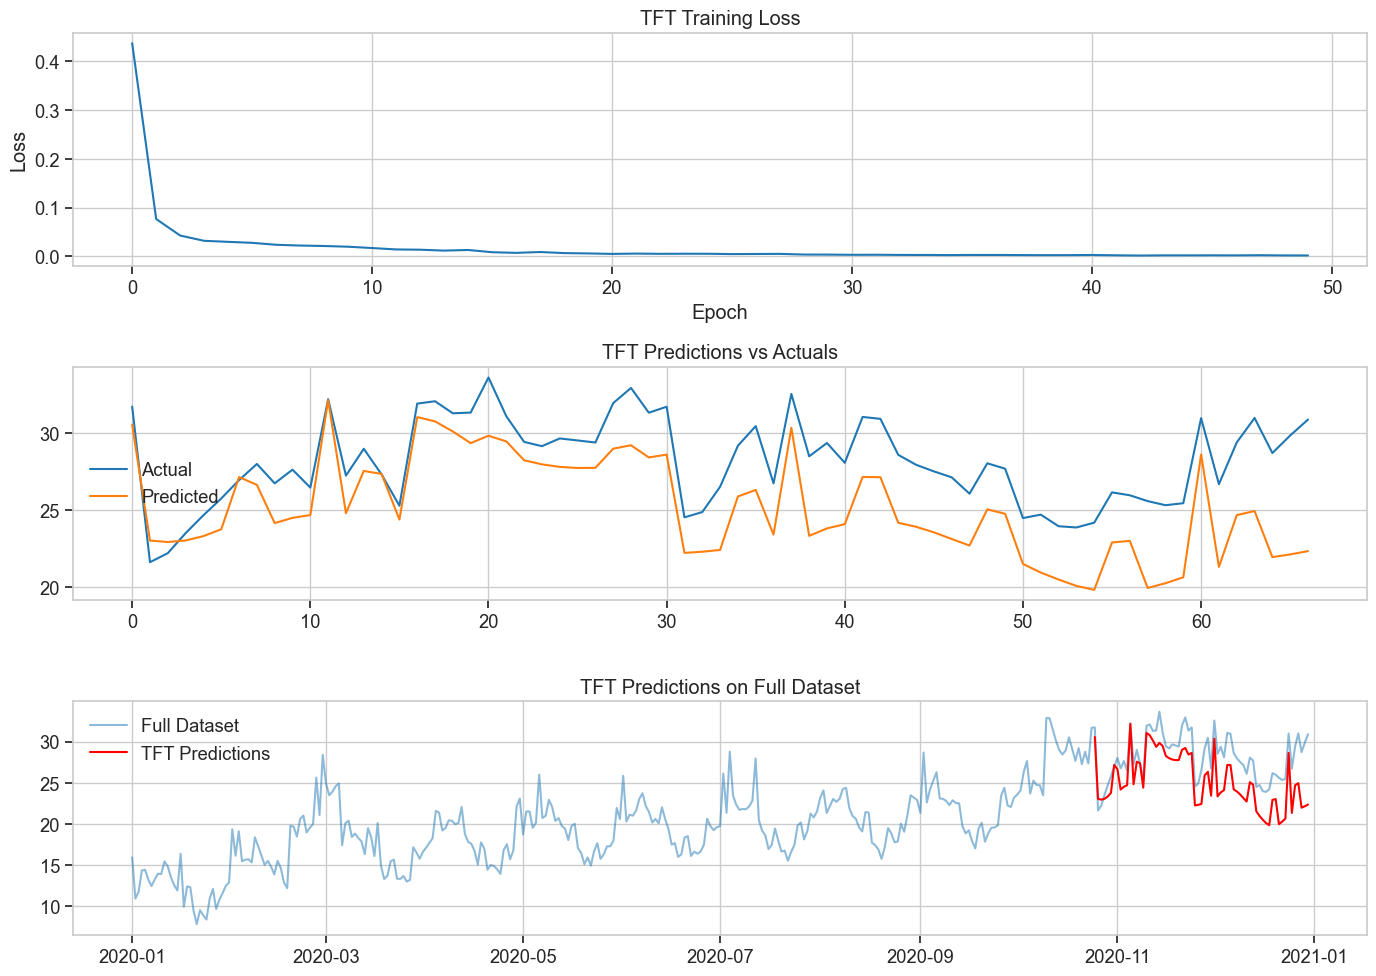


Model Comparison:
  Model        MSE      RMSE       MAE  Training Time (s)  Inference Time (s)
0  LSTM   9.484469  3.079687  2.466249           4.317877            0.010109
1   TFT  12.364368  3.516300  3.039497          10.354743            0.016104


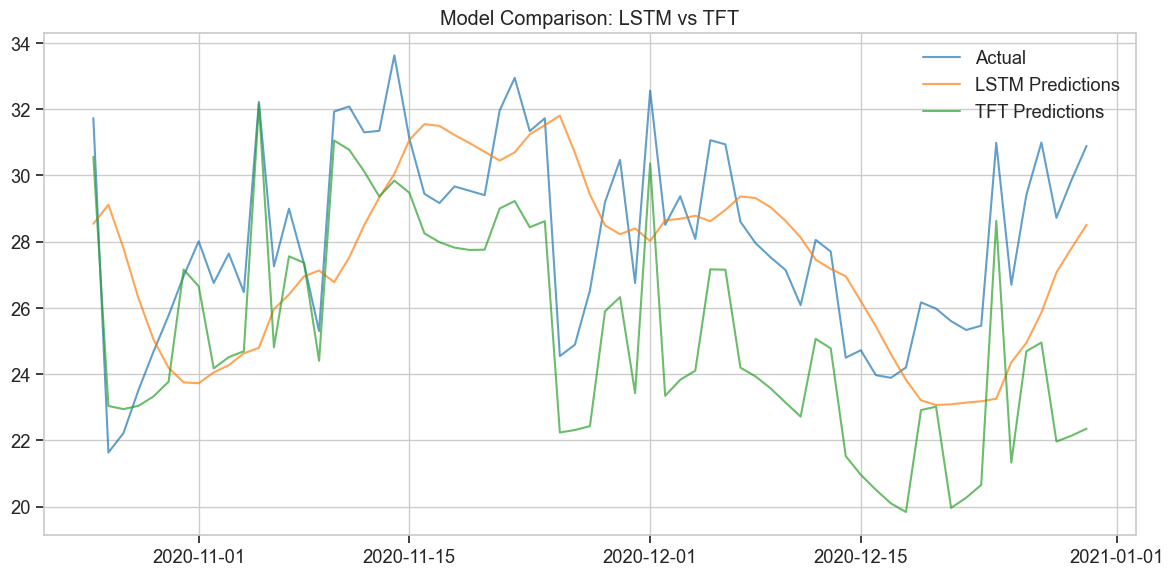

In [22]:
# Fixed TFT implementation to align with LSTM test code
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

# Import the TFT model
from models.tft_v3 import TemporalFusionTransformer

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

# Parameters - match with LSTM
sequence_length = 30  # Historical window
forecast_horizon = 1  # One-step-ahead prediction (like LSTM)
test_ratio = 0.2

# Define features
time_features = [
    'temperature', 'day_of_week_sin', 'day_of_week_cos', 
    'day_of_month_sin', 'day_of_month_cos', 'month_sin', 'month_cos'
]
static_features = ['is_weekend', 'is_holiday', 'is_promotion']

# Scale the data (using MinMaxScaler like in LSTM code)
tft_scaler = MinMaxScaler()
tft_values_scaled = tft_scaler.fit_transform(df[['value']].values)

# Create sequences for TFT (aligned with LSTM approach)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences (same as LSTM)
tft_X, tft_y = create_sequences(tft_values_scaled, sequence_length)

# Split into train and test sets
tft_test_size = int(len(tft_X) * test_ratio)
tft_train_size = len(tft_X) - tft_test_size
tft_X_train, tft_X_test = tft_X[:tft_train_size], tft_X[tft_train_size:]
tft_y_train, tft_y_test = tft_y[:tft_train_size], tft_y[tft_train_size:]

# Get corresponding static and time features
train_indices = list(range(sequence_length, sequence_length + tft_train_size))
test_indices = list(range(sequence_length + tft_train_size, sequence_length + tft_train_size + tft_test_size))

# Extract static and time features for training and testing
train_static = df[static_features].iloc[train_indices].values
test_static = df[static_features].iloc[test_indices].values

# Extract future time features (known at prediction time)
train_time = df[time_features].iloc[train_indices].values
test_time = df[time_features].iloc[test_indices].values

# Convert to PyTorch tensors
tft_X_train_tensor = torch.FloatTensor(tft_X_train)
tft_y_train_tensor = torch.FloatTensor(tft_y_train)
tft_X_test_tensor = torch.FloatTensor(tft_X_test)
tft_y_test_tensor = torch.FloatTensor(tft_y_test)

train_static_tensor = torch.FloatTensor(train_static)
test_static_tensor = torch.FloatTensor(test_static)
train_time_tensor = torch.FloatTensor(train_time)
test_time_tensor = torch.FloatTensor(test_time)

# Create a simple dataset class 
class TFTDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, static_features, time_features):
        self.X = X  # Historical values
        self.y = y  # Target values
        self.static = static_features  # Static features
        self.time = time_features  # Future time features
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return {
            'X': self.X[idx],
            'y': self.y[idx],
            'static': self.static[idx],
            'time': self.time[idx]
        }

# Create datasets
tft_train_dataset = TFTDataset(tft_X_train_tensor, tft_y_train_tensor, train_static_tensor, train_time_tensor)
tft_test_dataset = TFTDataset(tft_X_test_tensor, tft_y_test_tensor, test_static_tensor, test_time_tensor)

# Create data loaders
batch_size = 32
tft_train_loader = torch.utils.data.DataLoader(tft_train_dataset, batch_size=batch_size, shuffle=True)
tft_test_loader = torch.utils.data.DataLoader(tft_test_dataset, batch_size=batch_size, shuffle=False)

# Create TFT-compatible inputs from batches
def prepare_tft_batch(batch):
    # Extract components
    X = batch['X']  # [batch_size, seq_len, 1]
    static = batch['static']  # [batch_size, num_static]
    time = batch['time']  # [batch_size, num_time]
    targets = batch['y']  # [batch_size, 1]
    
    # 1. Prepare encoder inputs (target history only for now)
    encoder_inputs = [X]
    
    # 2. Prepare decoder inputs (future time features)
    decoder_inputs = []
    for i in range(time.shape[1]):
        # Reshape time feature to [batch_size, horizon=1, 1]
        feature = time[:, i:i+1].unsqueeze(1)
        decoder_inputs.append(feature)
    
    # 3. Prepare static inputs
    static_inputs = []
    for i in range(static.shape[1]):
        # Extract each static feature
        feature = static[:, i:i+1]
        static_inputs.append(feature)
    
    return {
        'encoder_inputs': encoder_inputs,
        'decoder_inputs': decoder_inputs,
        'static_inputs': static_inputs,
        'targets': targets
    }

# Initialize TFT model
tft_model = TemporalFusionTransformer(
    static_input_sizes=[1, 1, 1],  # Three static features
    encoder_input_sizes=[1],  # Target history
    decoder_input_sizes=[1] * len(time_features),  # Future time features
    hidden_dim=64,
    lstm_layers=2,
    dropout=0.1,
    num_heads=4,
    forecast_horizon=1,  # One-step ahead like LSTM
    backcast_length=sequence_length,
    output_dim=1,
    quantiles=[0.1, 0.5, 0.9]
)

# Define loss function (similar to LSTM's MSE)
tft_criterion = nn.MSELoss()

def tft_loss(outputs, targets):
    # Use median prediction (50th percentile)
    predictions = outputs[:, 0, 0, 1]  # [batch, horizon=1, output_dim=1, quantile=1(median)]
    return tft_criterion(predictions, targets.squeeze())

# Setup optimizer
tft_optimizer = optim.Adam(tft_model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
tft_train_losses = []
tft_start_time = time.time()

print("Starting TFT training...")
for epoch in range(num_epochs):
    tft_model.train()
    running_loss = 0.0
    
    for batch in tft_train_loader:
        # Prepare batch in TFT format
        tft_batch = prepare_tft_batch(batch)
        
        # Zero gradients
        tft_optimizer.zero_grad()
        
        # Forward pass
        outputs = tft_model(
            static_inputs=tft_batch['static_inputs'],
            encoder_inputs=tft_batch['encoder_inputs'],
            decoder_inputs=tft_batch['decoder_inputs']
        )
        
        # Compute loss
        loss = tft_loss(outputs, tft_batch['targets'])
        
        # Backward and optimize
        loss.backward()
        tft_optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(tft_train_loader)
    tft_train_losses.append(avg_loss)
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

tft_training_time = time.time() - tft_start_time
print(f"Training completed in {tft_training_time:.2f} seconds")

# Evaluation
tft_model.eval()
tft_predictions = []
tft_actuals = []
tft_inference_start = time.time()

with torch.no_grad():
    for batch in tft_test_loader:
        # Prepare batch in TFT format
        tft_batch = prepare_tft_batch(batch)
        
        # Forward pass
        outputs = tft_model(
            static_inputs=tft_batch['static_inputs'],
            encoder_inputs=tft_batch['encoder_inputs'],
            decoder_inputs=tft_batch['decoder_inputs']
        )
        
        # Get predictions (median)
        predictions = outputs[:, 0, 0, 1].cpu().numpy()  # [batch, 1]
        actuals = tft_batch['targets'].cpu().numpy()
        
        tft_predictions.append(predictions)
        tft_actuals.append(actuals)

tft_inference_time = time.time() - tft_inference_start

# Concatenate batches
tft_predictions = np.concatenate(tft_predictions)
tft_actuals = np.concatenate(tft_actuals)

# Reshape for inverse transform
tft_predictions = tft_predictions.reshape(-1, 1)
tft_actuals = tft_actuals.reshape(-1, 1)

# Inverse transform to original scale
tft_predictions = tft_scaler.inverse_transform(tft_predictions)
tft_actuals = tft_scaler.inverse_transform(tft_actuals)

# Calculate metrics
tft_mse = mean_squared_error(tft_actuals, tft_predictions)
tft_rmse = np.sqrt(tft_mse)
tft_mae = mean_absolute_error(tft_actuals, tft_predictions)

print(f"\nTFT Performance Metrics:")
print(f"Test MSE: {tft_mse:.4f}")
print(f"Test RMSE: {tft_rmse:.4f}")
print(f"Test MAE: {tft_mae:.4f}")
print(f"Inference time: {tft_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(tft_train_losses)
plt.title('TFT Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(tft_actuals, label='Actual')
plt.plot(tft_predictions, label='Predicted')
plt.title('TFT Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
tft_pred_dates = df.index[sequence_length + tft_train_size:sequence_length + tft_train_size + len(tft_predictions)]
plt.plot(tft_pred_dates, tft_predictions, label='TFT Predictions', color='red')
plt.title('TFT Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
tft_results = {
    'model': 'TFT',
    'mse': tft_mse,
    'rmse': tft_rmse,
    'mae': tft_mae,
    'training_time': tft_training_time,
    'inference_time': tft_inference_time,
    'predictions': tft_predictions,
    'actuals': tft_actuals,
    'prediction_dates': tft_pred_dates
}

# Compare with LSTM results
comparison_df = pd.DataFrame({
    'Model': ['LSTM', 'TFT'],
    'MSE': [lstm_results['mse'], tft_results['mse']],
    'RMSE': [lstm_results['rmse'], tft_results['rmse']],
    'MAE': [lstm_results['mae'], tft_results['mae']],
    'Training Time (s)': [lstm_results['training_time'], tft_results['training_time']],
    'Inference Time (s)': [lstm_results['inference_time'], tft_results['inference_time']]
})

print("\nModel Comparison:")
print(comparison_df)

# Visualize comparison
plt.figure(figsize=(12, 6))
plt.plot(lstm_results['prediction_dates'], lstm_results['actuals'], label='Actual', alpha=0.7)
plt.plot(lstm_results['prediction_dates'], lstm_results['predictions'], label='LSTM Predictions', alpha=0.7)
plt.plot(tft_results['prediction_dates'], tft_results['predictions'], label='TFT Predictions', alpha=0.7)
plt.title('Model Comparison: LSTM vs TFT')
plt.legend()
plt.tight_layout()
plt.show()